In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from wordcloud import WordCloud
from scipy.stats.mstats import winsorize

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_theme(style="whitegrid", palette="Set2")  
BASE_PALETTE = sns.color_palette()

plt.rcParams.update({
    "figure.figsize": (8, 5),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "axes.edgecolor": "#333333",
    "axes.linewidth": 1.2,
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial"],
    "grid.alpha": 0.4,
    "grid.linestyle": "--"
})

Loading the dataset

In [2]:
df = pd.read_csv('Final_data.csv')
df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.00          1080.90     Strength       26.800377   
1                      1.37          1809.91         HIIT       27.655021   
2                      0.91           802.26       Cardio       24.320821   
3                      1.10          1450.79         HIIT       32.813572   
4                      1.08          1166.40     Strength       17.307319   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                   1.50                           3.99              2.01   
1                   1.90                           4.00              2.01   
2                   1.88                           2.99              1.02   
3                   2.50                           3.99              1.99   
4                   2.91                           4.00              2.00   

     BMI  Daily meals frequency  Physical exercise   Carbs  Proteins   Fats  \
0  24.87                   2.99               0.01  267.68    106.05  71.63   
1  23.48                   3.01               0.97  214.32     85.41  56.97   
2  21.15                   1.99              -0.02  246.04     98.11  65.48   
3  32.45                   3.00               0.04  203.22     80.84  54.56   
4  14.83                   3.00               3.00  332.79    133.05  88.43   

   Calories meal_name  meal_type   diet_type  sugar_g  sodium_mg  \
0    1806.0     Other      Lunch       Vegan    31.77    1729.94   
1    1577.0     Other      Lunch  Vegetarian    12.34     693.08   
2    1608.0     Other  Breakfast       Paleo    42.81    2142.48   
3    2657.0     Other      Lunch       Paleo     9.34     123.20   
4    1470.0     Other  Breakfast       Vegan    23.78    1935.11   

   cholesterol_mg  serving_size_g cooking_method  prep_time_min  \
0          285.05          120.47        Grilled          16.24   
1          300.61          109.15          Fried          16.47   
2          215.42          399.43         Boiled          54.35   
3            9.70          314.31          Fried          27.73   
4          116.89           99.22          Baked          34.16   

   cook_time_min  rating   Name of Exercise  Sets   Reps  \
0         110.79    1.31   Decline Push-ups  4.99  20.91   
1          12.01    1.92        Bear Crawls  4.01  16.15   
2           6.09    4.70               Dips  5.00  21.90   
3         103.72    4.85  Mountain Climbers  4.01  16.92   
4          46.55    3.07        Bicep Curls  4.99  15.01   

                                           Benefit  \
0             Improves shoulder health and posture   
1                            Strengthens lower abs   
2                            Builds chest strength   
3  Improves coordination and cardiovascular health   
4      Targets obliques and improves core rotation   

   Burns Calories (per 30 min)    Target Muscle Group        Equipment Needed  \
0                       342.58     Shoulders, Triceps           Cable Machine   
1                       357.16  Back, Core, Shoulders             Step or Box   
2                       359.63     Quadriceps, Glutes             Step or Box   
3                       351.65       Biceps, Forearms  Parallel Bars or Chair   
4                       329.36         Chest, Triceps                    Wall   

  Difficulty Level  Body Part Type of Muscle                 Workout  \
0         Advanced       Legs           Lats          Dumbbell flyes   
1     Intermediate

In [3]:
df.shape

(20000, 54)

In [4]:
df.describe().T

count          mean           std  \
Age                             20000.0  3.885145e+01  1.211458e+01   
Weight (kg)                     20000.0  7.389883e+01  2.117301e+01   
Height (m)                      20000.0  1.723093e+00  1.270328e-01   
Max_BPM                         20000.0  1.798897e+02  1.151081e+01   
Avg_BPM                         20000.0  1.437043e+02  1.426769e+01   
Resting_BPM                     20000.0  6.219581e+01  7.289351e+00   
Session_Duration (hours)        20000.0  1.259446e+00  3.413362e-01   
Calories_Burned                 20000.0  1.280110e+03  5.022290e+02   
Fat_Percentage                  20000.0  2.610131e+01  4.996160e+00   
Water_Intake (liters)           20000.0  2.627485e+00  6.047240e-01   
Workout_Frequency (days/week)   20000.0  3.318629e+00  9.111979e-01   
Experience_Level                20000.0  1.809176e+00  7.362036e-01   
BMI                             20000.0  2.492168e+01  6.701126e+00   
Daily meals frequency           20000.0  2.864804e+00  6.366486e-01   
Physical exercise               20000.0  4.525030e-01  9.866276e-01   
Carbs                           20000.0  2.497786e+02  5.510862e+01   
Proteins                        20000.0  9.991829e+01  2.204367e+01   
Fats                            20000.0  6.661217e+01  1.469928e+01   
Calories                        20000.0  2.024418e+03  5.418915e+02   
sugar_g                         20000.0  2.453104e+01  1.444610e+01   
sodium_mg                       20000.0  1.258140e+03  7.166190e+02   
cholesterol_mg                  20000.0  1.484656e+02  8.738282e+01   
serving_size_g                  20000.0  3.027195e+02  1.157119e+02   
prep_time_min                   20000.0  3.351745e+01  1.652687e+01   
cook_time_min                   20000.0  6.150216e+01  3.357975e+01   
rating                          20000.0  2.989303e+00  1.157692e+00   
Sets                            20000.0  4.425059e+00  5.795959e-01   
Reps                            20000.0  1.942732e+01  3.679707e+00   
Burns Calories (per 30 min)     20000.0  3.440465e+02  3.213878e+01   
BMI_calc                        20000.0  2.492165e+01  6.701144e+00   
cal_from_macros                 20000.0  1.998297e+03  4.408484e+02   
pct_carbs                       20000.0  4.999830e-01  1.455490e-03   
protein_per_kg                  20000.0  1.460142e+00  5.189455e-01   
pct_HRR                         20000.0  6.990053e-01  1.448804e-01   
pct_maxHR                       20000.0  8.023050e-01  9.661268e-02   
cal_balance                     20000.0  7.443087e+02  7.209466e+02   
lean_mass_kg                    20000.0  5.378638e+01  1.249874e+01   
expected_burn                   20000.0  8.663523e+02  2.503171e+02   
Burns Calories (per 30 min)_bc  20000.0  8.631802e+19  3.197579e+19   

                                         min           25%           50%  \
Age                             1.800000e+01  2.817000e+01  3.986500e+01   
Weight (kg)                     3.918000e+01  5.816000e+01  7.000000e+01   
Height (m)                      1.490000e+00  1.620000e+00  1.710000e+00   
Max_BPM                         1.593100e+02  1.700575e+02  1.801400e+02   
Avg_BPM                         1.190700e+02  1.312200e+02  1.429900e+02   
Resting_BPM                     4.949000e+01  5.596000e+01  6.220000e+01   
Session_Duration (hours)        4.900000e-01  1.050000e+00  1.270000e+00   
Calories_Burned                 3.231100e+02  9.108000e+02  1.231450e+03   
Fat_Percentage                  1.133313e+01  2.238781e+01  2.582250e+01   
Water_Intake (liters)           1.460000e+00  2.170000e+00  2.610000e+00   
Workout_Frequency (days/week)   1.940000e+00  2.980000e+00  3.010000e+00   
Experience_Level                1.000000e+00  1.010000e+00  1.990000e+00   
BMI                             1.204000e+01  2.009750e+01  2.412000e+01   
Daily meals frequency           1.950000e+00  2.020000e+00  3.000000e+00   
Physical exercise              -7.000000e-02 -1.00000

Missing values

In [5]:
null_counts = df.isnull().sum().reset_index()
null_counts.columns = ['Column', 'Missing_Values']

display(null_counts)

Column  Missing_Values
0                              Age               0
1                           Gender               0
2                      Weight (kg)               0
3                       Height (m)               0
4                          Max_BPM               0
5                          Avg_BPM               0
6                      Resting_BPM               0
7         Session_Duration (hours)               0
8                  Calories_Burned               0
9                     Workout_Type               0
10                  Fat_Percentage               0
11           Water_Intake (liters)               0
12   Workout_Frequency (days/week)               0
13                Experience_Level               0
14                             BMI               0
15           Daily meals frequency               0
16               Physical exercise               0
17                           Carbs               0
18                        Proteins               0
19                            Fats               0
20                        Calories               0
21                       meal_name               0
22                       meal_type               0
23                       diet_type               0
24                         sugar_g               0
25                       sodium_mg               0
26                  cholesterol_mg               0
27                  serving_size_g               0
28                  cooking_method               0
29                   prep_time_min               0
30                   cook_time_min               0
31                          rating               0
32                Name of Exercise               0
33                            Sets               0
34                            Reps               0
35                         Benefit               0
36     Burns Calories (per 30 min)               0
37             Target Muscle Group               0
38                Equipment Needed               0
39                Difficulty Level               0
40                       Body Part               0
41                  Type of Muscle               0
42                         Workout               0
43                        BMI_calc               0
44                 cal_from_macros               0
45                       pct_carbs               0
46                  protein_per_kg               0
47                         pct_HRR               0
48                       pct_maxHR               0
49                     cal_balance               0
50                    lean_mass_kg               0
51                   expected_burn               0
52  Burns Calories (per 30 min)_bc               0
53              Burns_Calories_Bin               0

In [6]:
print("Number of duplicates:\n", df.duplicated().sum())

Number of duplicates:
 0


In [7]:
num_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 
            'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI', 
            'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg', 
            'cholesterol_mg', 'serving_size_g', 'prep_time_min', 'cook_time_min', 'rating', 'Sets', 'Reps', 
            'Burns Calories (per 30 min)', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 
            'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc']

cat_cols = ['Gender', 'Workout_Type', 'Experience_Level', 'meal_name', 'meal_type', 'diet_type', 'cooking_method', 'Name of Exercise', 
            'Benefit', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout',
            'Burns_Calories_Bin']

In [8]:
summary_data = []

for col in cat_cols:
    # Drop NaNs but keep original strings intact
    vals = df[col].dropna()

    # Unique values sorted alphabetically
    unique_vals = sorted(pd.Index(vals).drop_duplicates().tolist(), key=lambda x: str(x).lower())

    # Most frequent value
    most_frequent = vals.mode().iloc[0] if not vals.mode().empty else None

    # Add to summary table
    summary_data.append({
        'Column': col,
        'Unique Count': len(unique_vals),
        'Most Frequent Value': most_frequent,
        'Unique Values': "\n".join(map(str, unique_vals))
    })

# Create summary table
summary_table = pd.DataFrame(summary_data)

# Display nicely
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 0)

display(summary_table.style.set_properties(**{'white-space': 'pre-wrap'}))


Drop "meal_name" as it has only one value "Other"

In [9]:
df = df.drop(columns=["meal_name"])

In [10]:
# The columns below are very close to integers (e.g., 1.01, 2.99), so we round them to clean up the data.
# Additionally, attributes like workout frequency, sets, and reps cannot logically be decimals.
cols_to_round = [
    'Age',
    'Workout_Frequency (days/week)',
    'Daily meals frequency',
    'Experience_Level',
    'Sets',
    'Reps'
]
df[cols_to_round] = df[cols_to_round].round().astype(int)


# These columns represent physical or nutritional quantities, which cannot be negative.
cols_with_neg_val = ["Physical exercise", "sugar_g", "cholesterol_mg"]
df = df[(df[cols_with_neg_val] >= 0).all(axis=1)]

display(df[cols_to_round].head(20))

Age  Workout_Frequency (days/week)  Daily meals frequency  Experience_Level  Sets  Reps
0    35                              4                      3                 2     5    21
1    23                              4                      3                 2     4    16
3    39                              4                      3                 2     4    17
4    45                              4                      3                 2     5    15
7    56                              4                      3                 2     5    19
8    24                              4                      3                 3     4    24
9    39                              2                      3                 1     4    16
10   51                              4                      3                 3     5    17
11   48                              5                      3                 3     4    21
12   19                              5                      3                 3     4    24
13   38                              5                      4                 3     5    15
14   27                              3                      3                 1     4    15
15   19                              4                      2                 2     5    18
16   40                              5                      2                 3     5    21
18   19                              3                      3                 1     4    25
19   46                              4                      2                 2     4    23
20   37                              3                      3                 2     5    23
22   31                              4                      2                 2     4    24
24   51                              4                      2                 2     4    15
25   54                              3                      3                 2     5    17

### Distributions of categorical columns

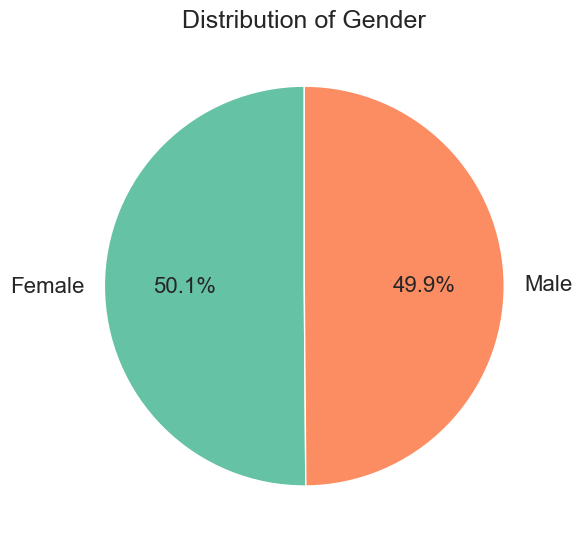

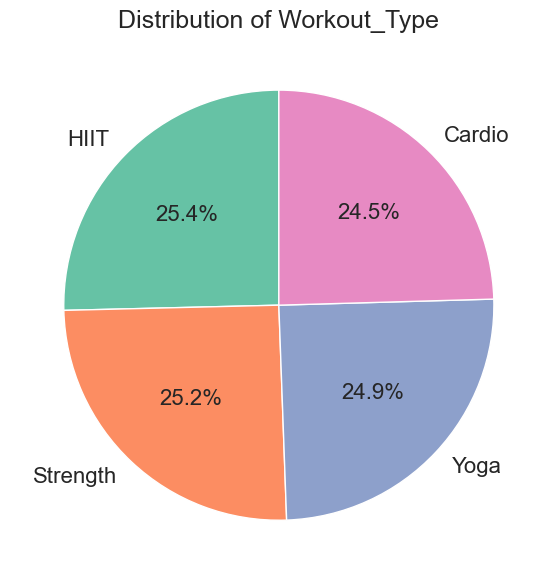

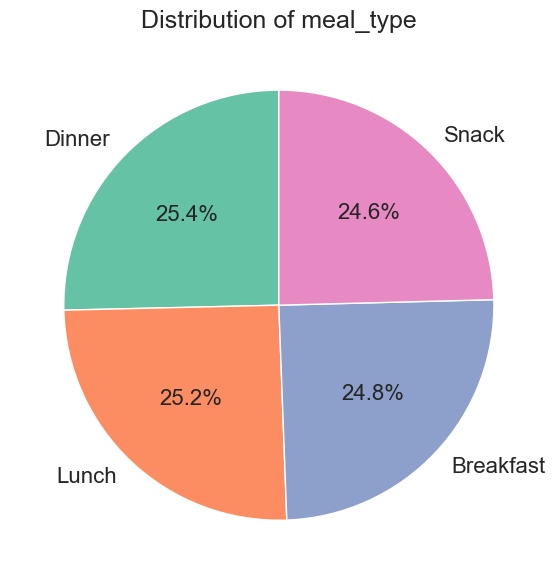

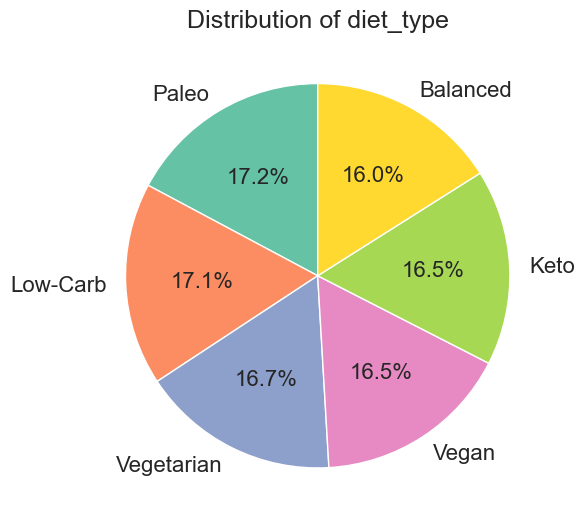

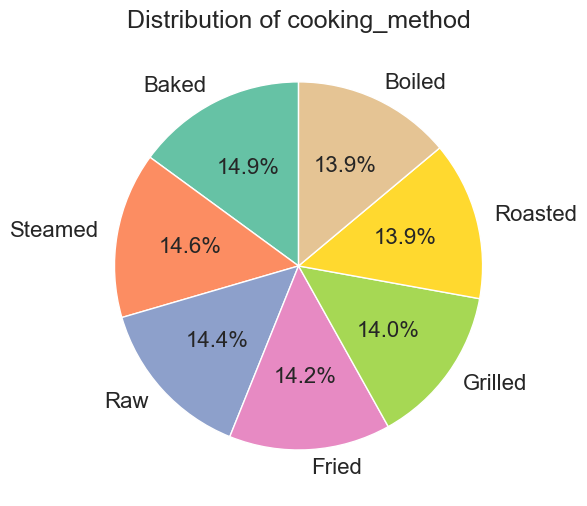

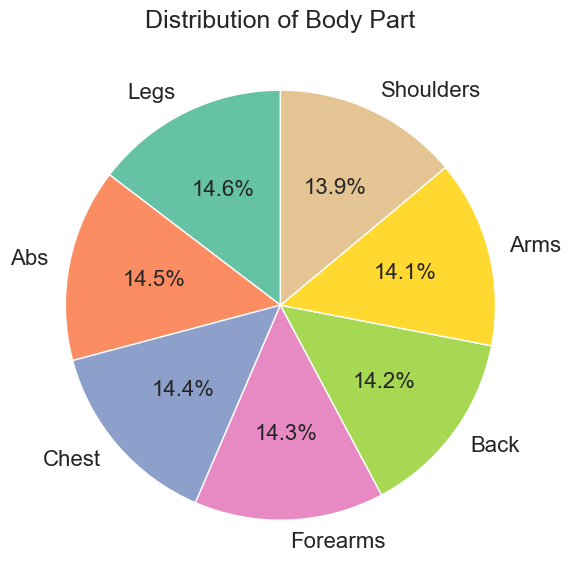

In [11]:
pie_cols = ["Gender", "Workout_Type", "meal_type", "diet_type", "cooking_method", "Body Part"]

for col in pie_cols:
    plt.figure(figsize=(6, 6))
    values = df[col].value_counts(dropna=False)
    plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
    plt.title(f"Distribution of {col}", fontsize=18)
    plt.tight_layout()
    plt.show()


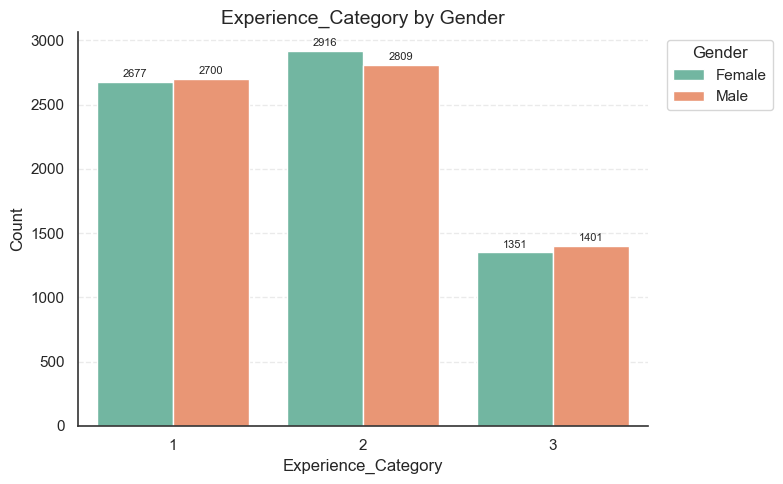

In [12]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(
    data=df,
    x="Experience_Level",                    
    hue="Gender",
    order=sorted(df["Experience_Level"].unique())
)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)

plt.title("Experience_Category by Gender")
plt.xlabel("Experience_Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1.02, 1))
sns.despine()
plt.tight_layout()
plt.show()


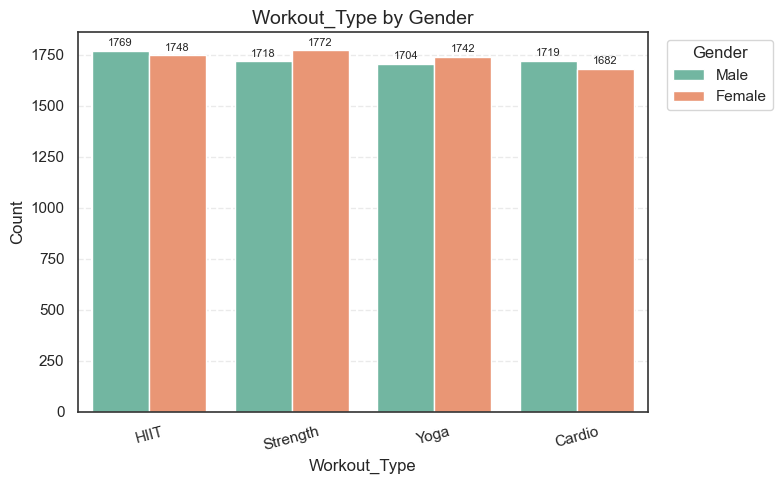

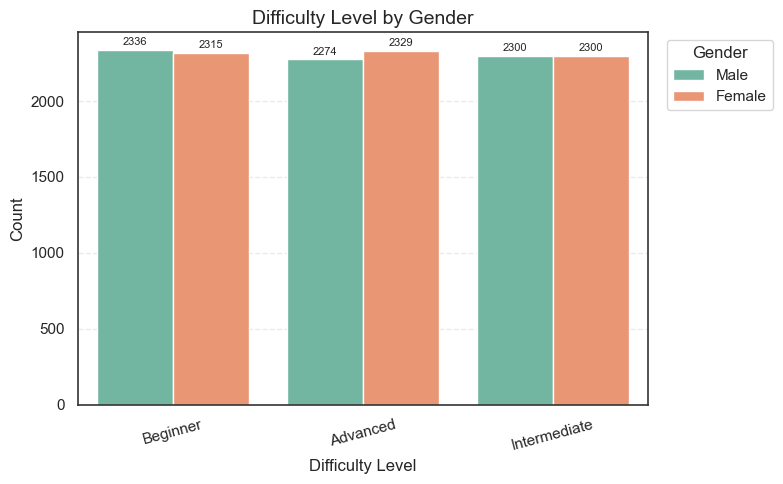

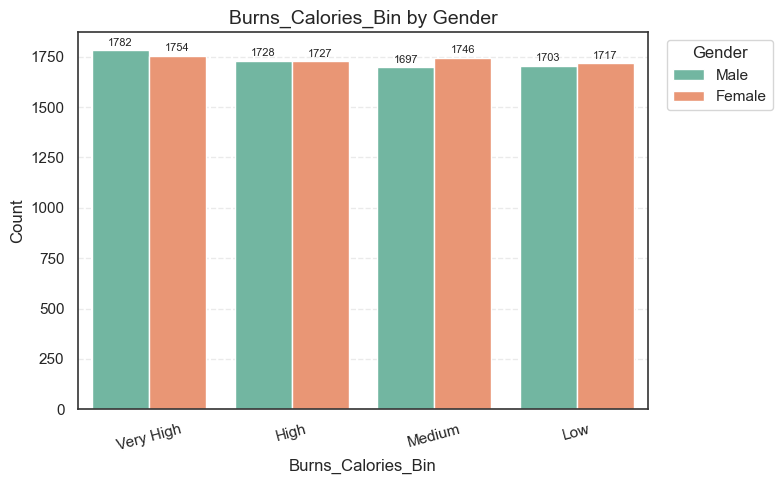

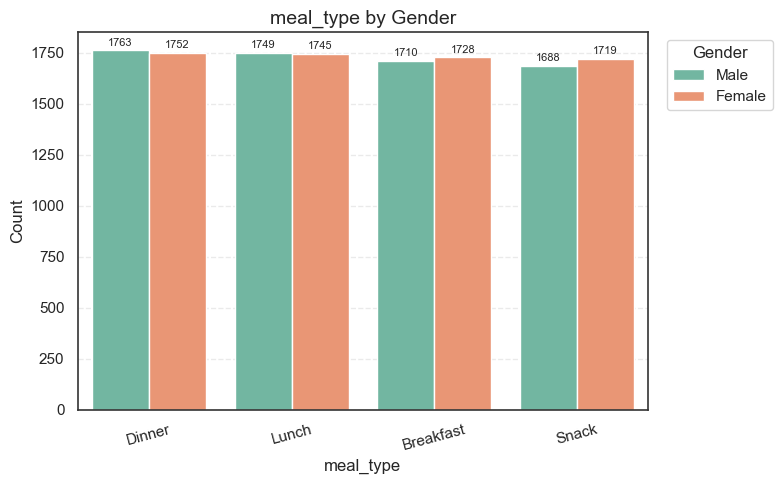

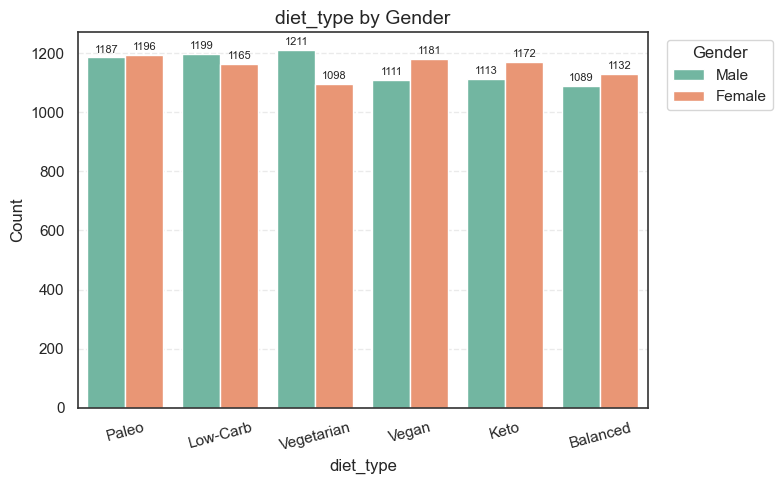

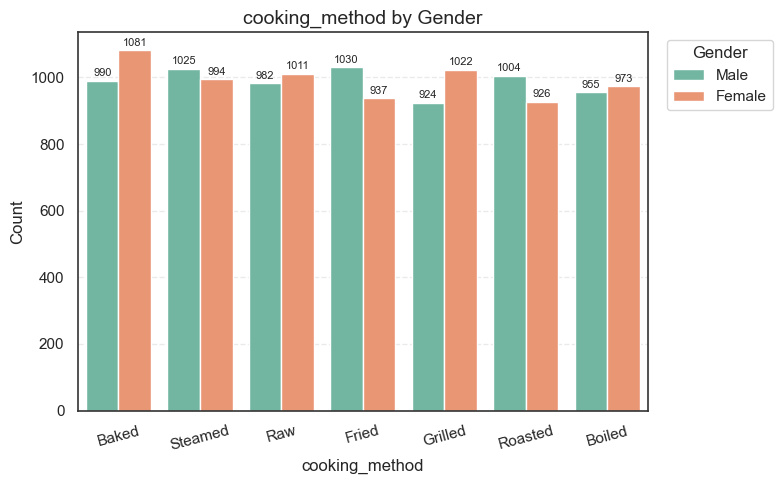

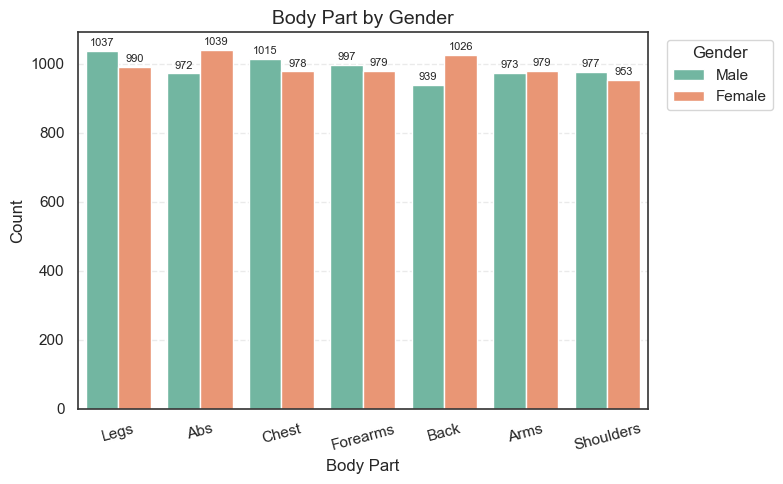

In [13]:
cols_by_gender = ["Workout_Type", "Difficulty Level", "Burns_Calories_Bin", "meal_type", "diet_type", "cooking_method", "Body Part"]

for col in cols_by_gender:
    plt.figure(figsize=(8, 5))
    
    ax = sns.countplot(
        data=df,
        x=col,
        hue="Gender",
        order=df[col].value_counts().index
    )
    
    # Add count labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)
    
    plt.title(f"{col} by Gender")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=15)
    plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1.02, 1))
    plt.tight_layout()
    plt.show()


### Distributions of original numerical columns 

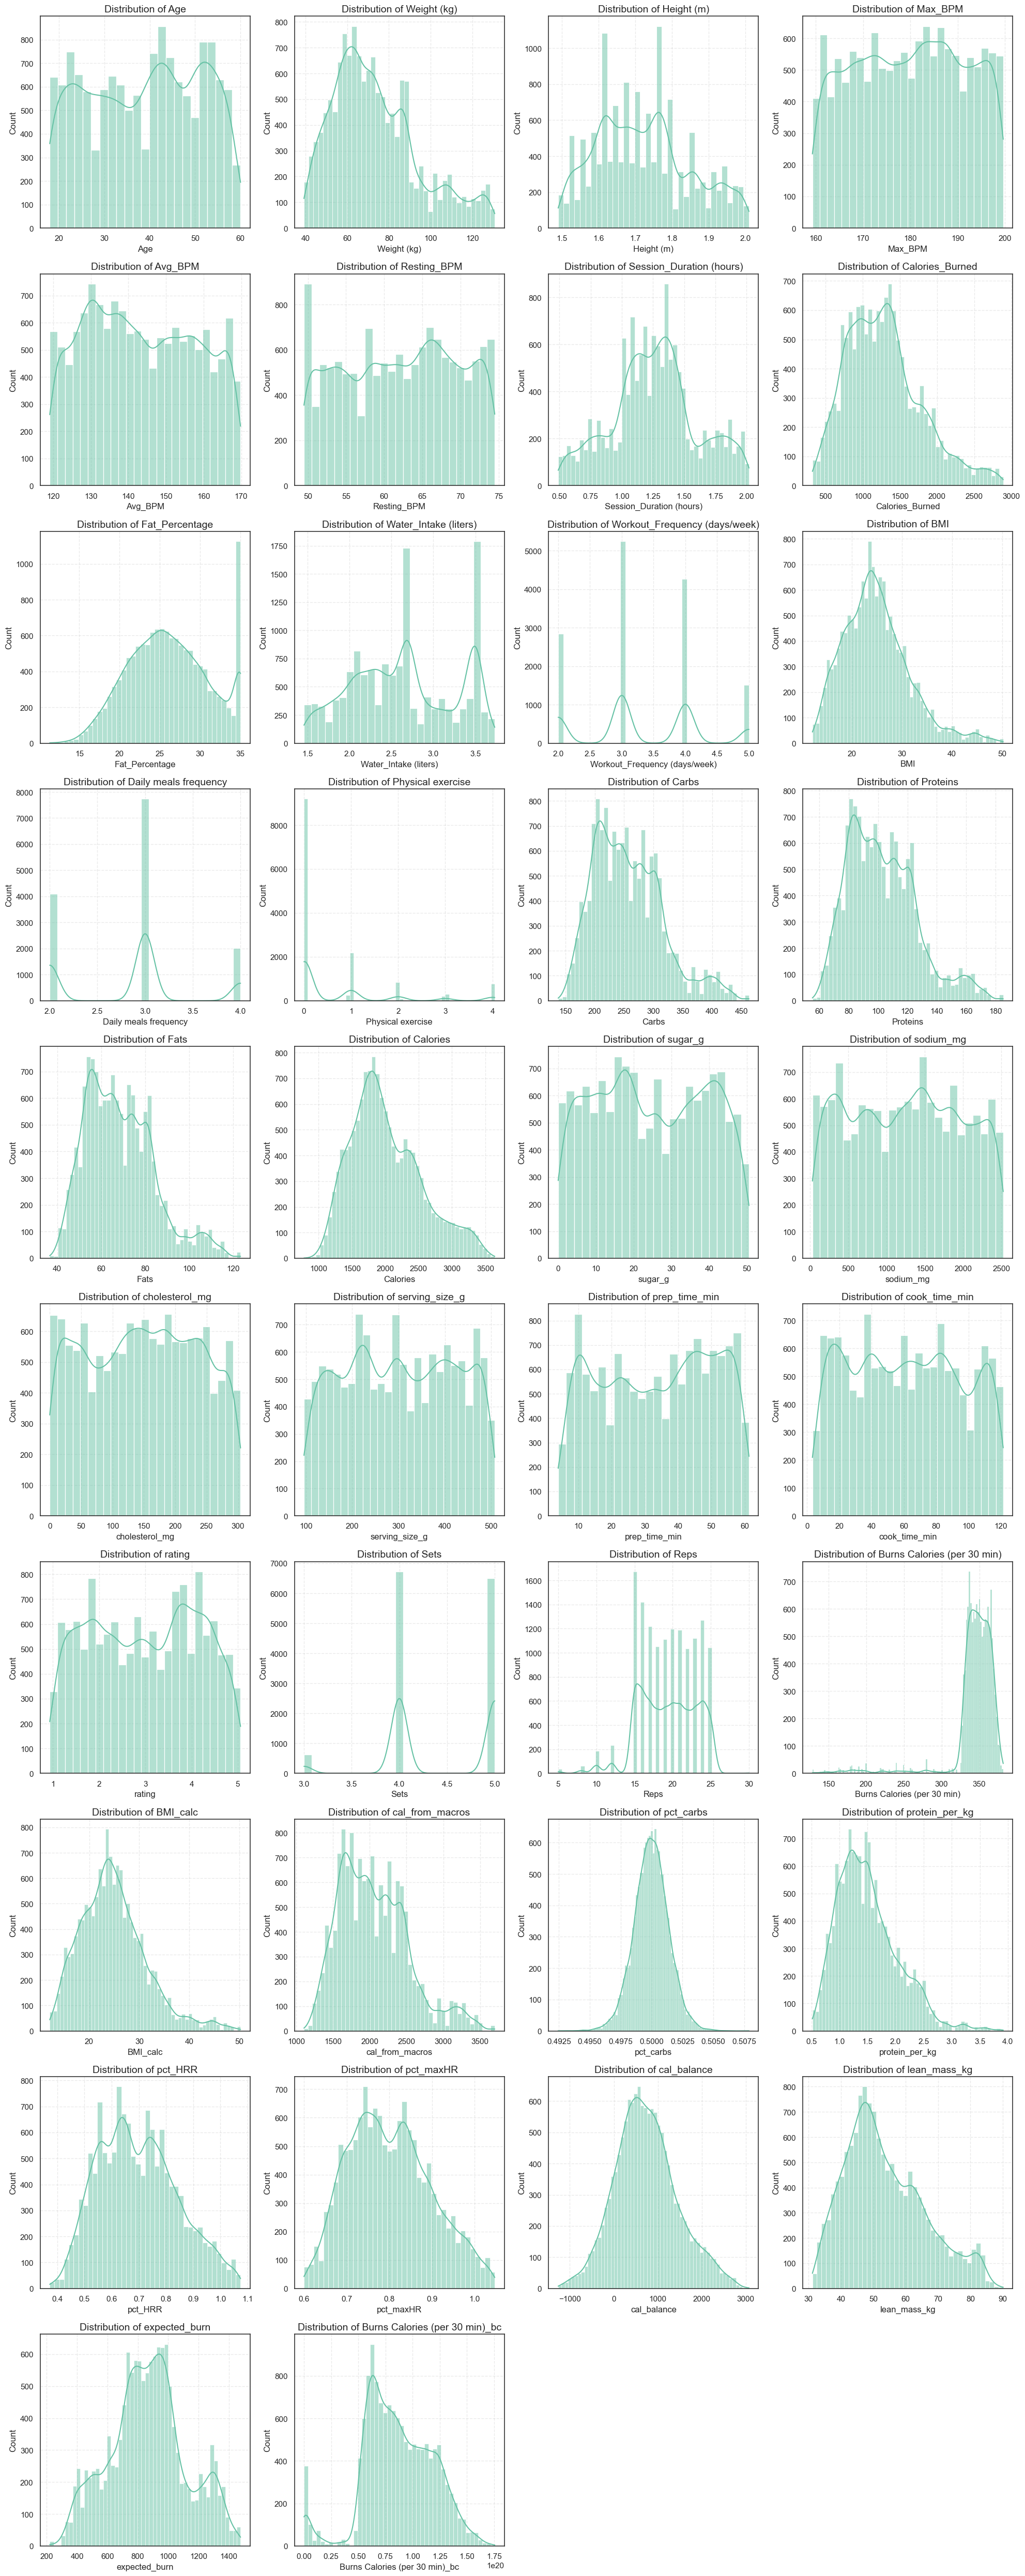

In [14]:
plt.figure(figsize=(20, 50))
for i, col in enumerate(num_cols, 1):
    plt.subplot(10, 4, i)
    sns.histplot(df[col], kde=True) 
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

Most popular values for categorical attributes with a lot of possible values

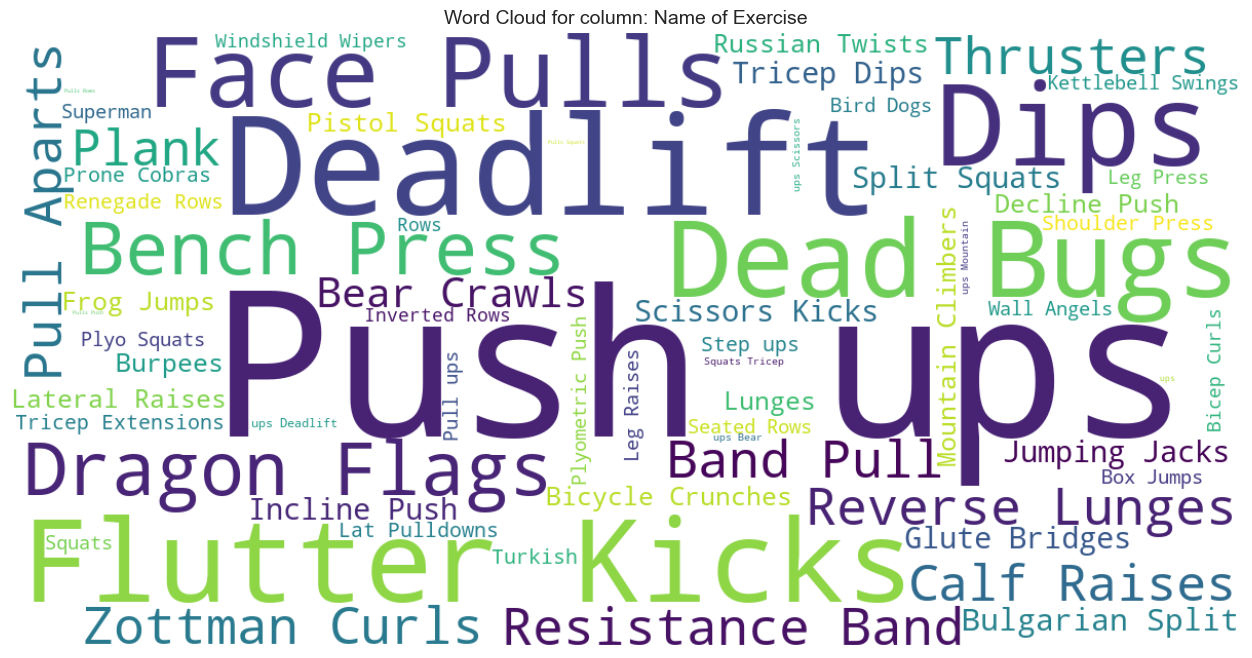

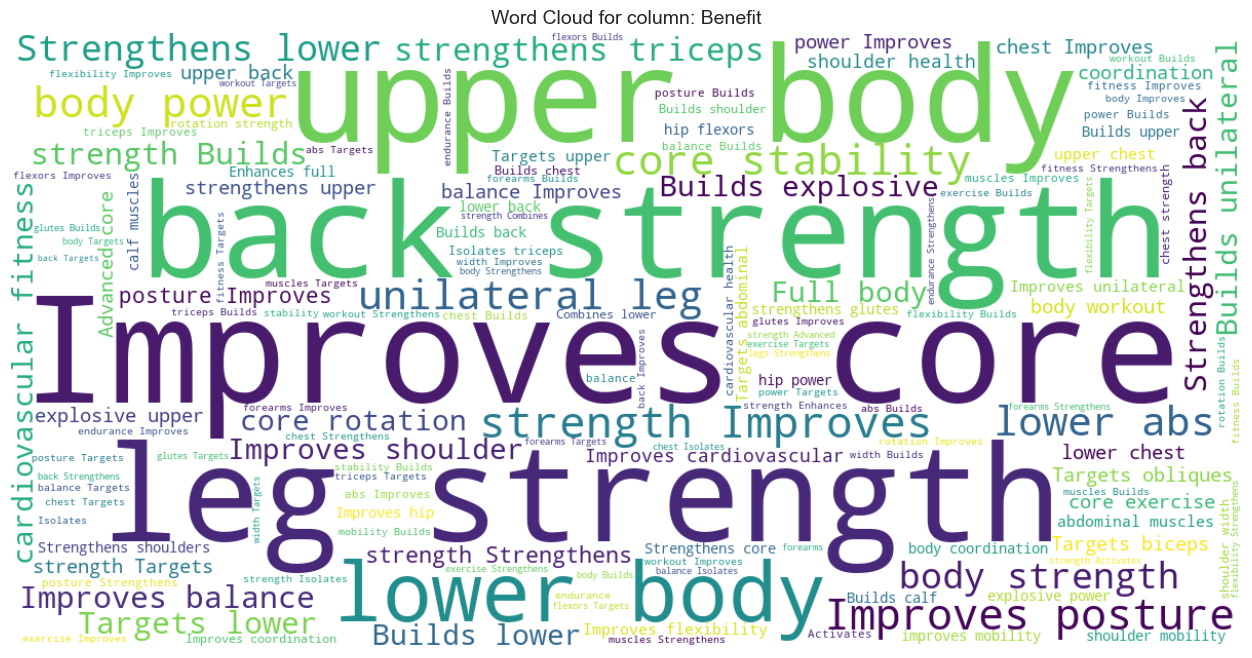

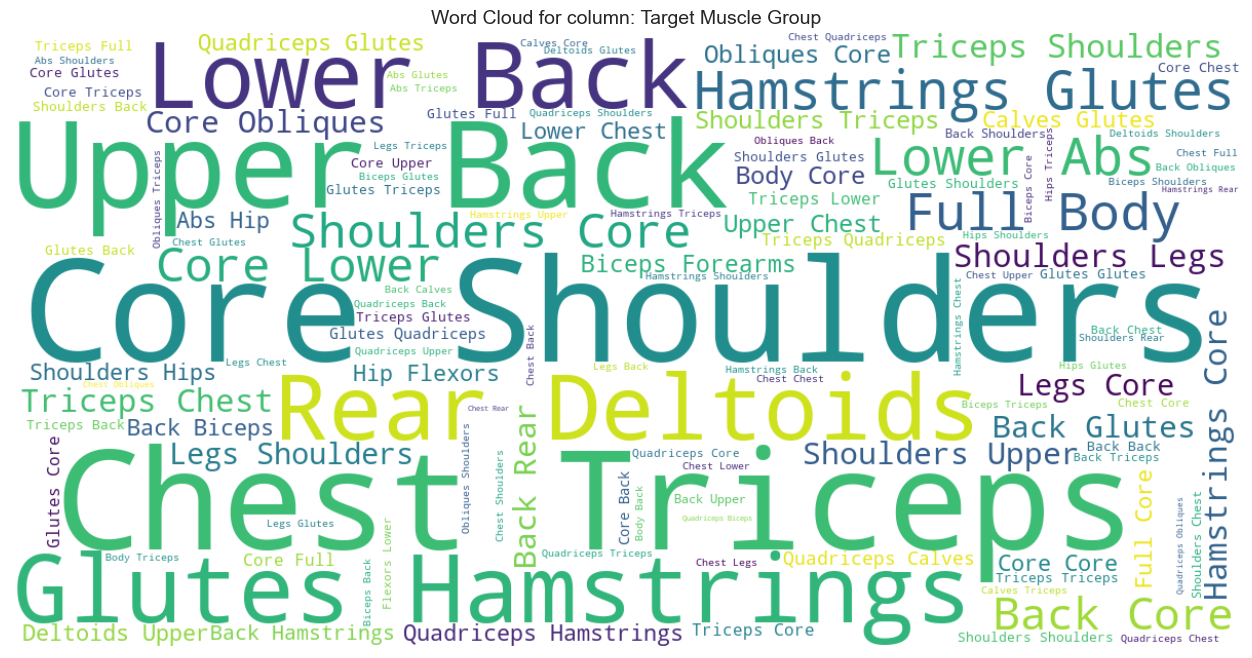

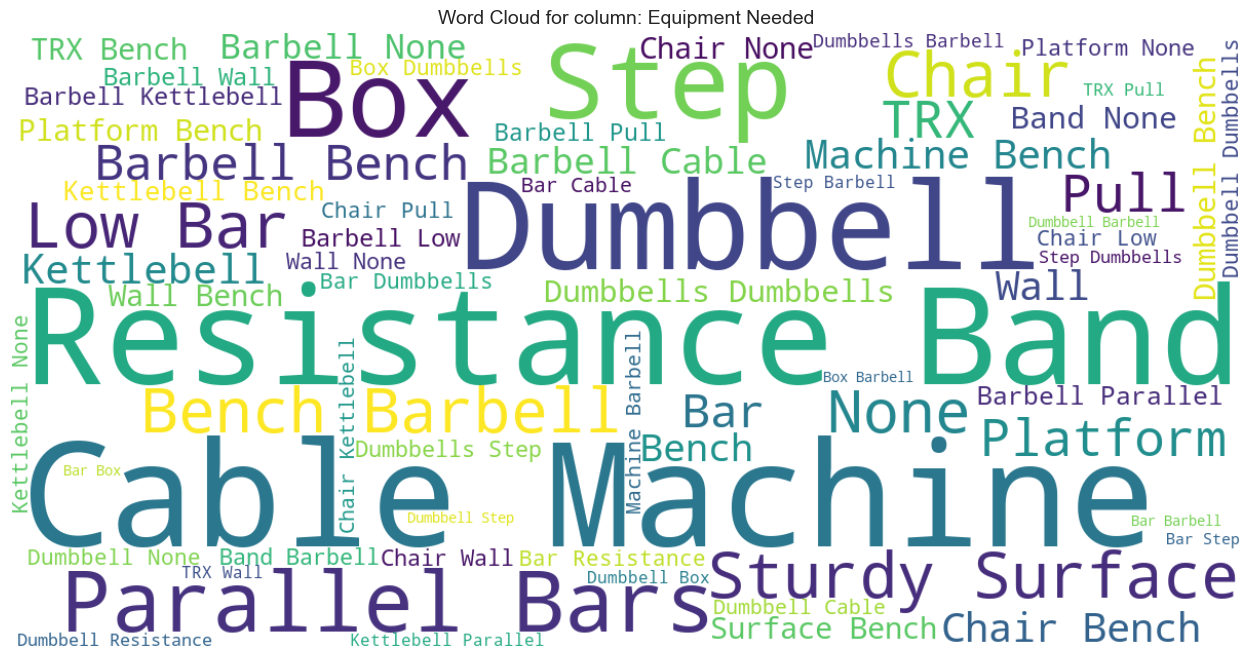

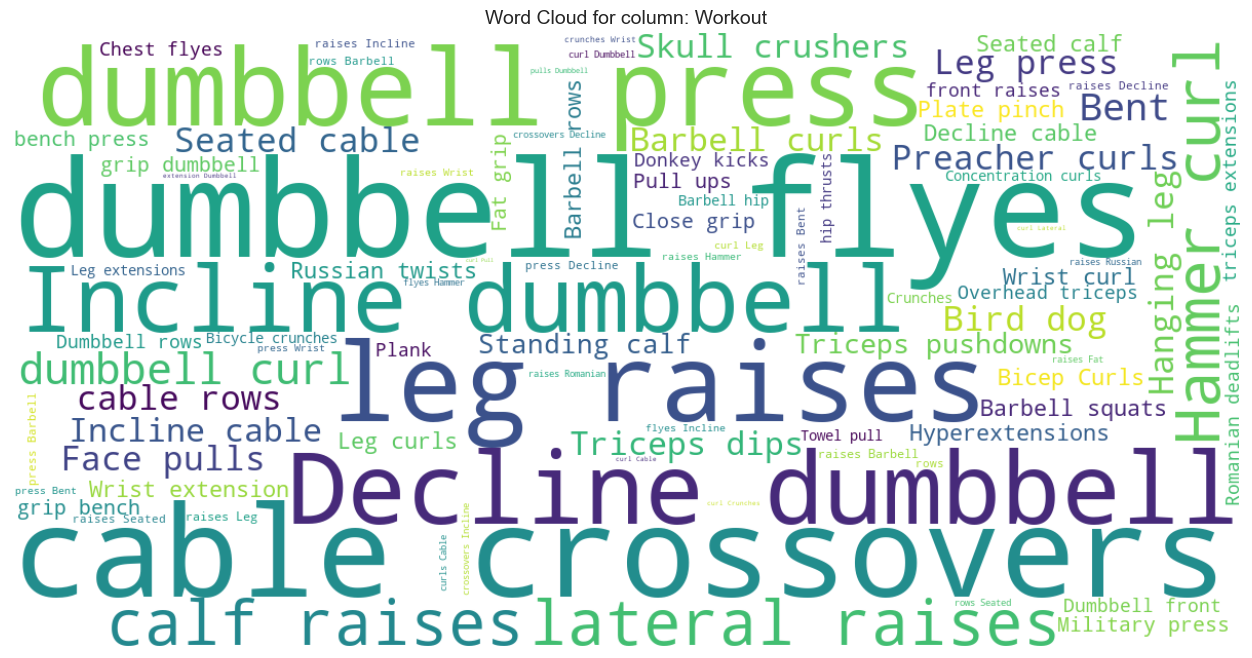

In [15]:
columns = ['Name of Exercise', 'Benefit', 'Target Muscle Group', 'Equipment Needed', 'Workout']

for column in columns:
    text = " ".join(df[column].astype(str).dropna().tolist())
    wordcloud = WordCloud(
        width=1200,
        height=600,
        background_color='white'
    ).generate(text)

    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for column: {column}")
    plt.show()

These attributes are calculated from others. That's why we are going to recalculate them to make sure they contain valid values.

In [16]:
calc_columns = ['BMI', 'Burns Calories (per 30 min)', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 
            'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc']
df['BMI_new'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)

df['Burn_Cal_per30min'] = (df['Calories_Burned'] / (df['Session_Duration (hours)'] * 60)) * 30

df["Cal_from_macroelemets"] = (df["Proteins"] * 4 + df["Carbs"] * 4 + df["Fats"] * 9)

# percent of carbs
df['Carbs_percent'] = (df['Carbs'] * 4) / df['Cal_from_macroelemets'] * 100

df['Protein_p_kg'] = df['Proteins'] / df['Weight (kg)']

# HRR = HRmax − HRrest (Heart Rate Reserv)
df['HRR'] = (df['Avg_BPM'] - df['Resting_BPM']) / (df['Max_BPM'] - df['Resting_BPM']) * 100

df['maxHR_percent'] = df['Avg_BPM'] / df['Max_BPM'] * 100

df['Cal_blnc'] = df['Calories'] - df['Calories_Burned']

# lean_mass_kg (сухая масса тела)
df['Lean_kg'] = df['Weight (kg)'] * (1 - df['Fat_Percentage'] / 100)

# MET * weight * 0.0175 * time
df['exptd_burn'] = (0.1 * df['Avg_BPM'] + 1.0) * df['Weight (kg)'] * 0.0175 * df['Session_Duration (hours)'] * 60

And now we are going to check in recalculated values are equal to initial one.

In [17]:
pairs = {
    'BMI': 'BMI_new',
    'BMI_calc': 'BMI_new',
    'Burns Calories (per 30 min)': 'Burn_Cal_per30min',
    'Burns Calories (per 30 min)_bc': 'Burn_Cal_per30min',
    'cal_from_macros': 'Cal_from_macroelemets',
    'pct_carbs': 'Carbs_percent',
    'protein_per_kg': 'Protein_p_kg',
    'pct_HRR': 'HRR',
    'pct_maxHR': 'maxHR_percent',
    'cal_balance': 'Cal_blnc',
    'lean_mass_kg': 'Lean_kg',
    'expected_burn': 'expected_burn'
}

results = {}
df1 = df.copy()

for old_col, new_col in pairs.items():
    diff_col = f"{old_col}_diff"
    match_col = f"{old_col}_matches"

    df1[diff_col] = df1[new_col] - df[old_col]
    df1[match_col] = np.isclose(df1[new_col], df1[old_col], atol=1e-5)

    results[old_col] = df1[match_col].all()

# In what columns we have the same value for calculated and initial
comparison_summary = pd.DataFrame({
    'Attribute': results.keys(),
    'Matches': results.values()
})

print(comparison_summary)

                         Attribute  Matches
0                              BMI    False
1                         BMI_calc     True
2      Burns Calories (per 30 min)    False
3   Burns Calories (per 30 min)_bc    False
4                  cal_from_macros     True
5                        pct_carbs    False
6                   protein_per_kg     True
7                          pct_HRR    False
8                        pct_maxHR    False
9                      cal_balance     True
10                    lean_mass_kg     True
11                   expected_burn     True


In [18]:
df = df.drop(columns=calc_columns)

In [19]:
num_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 
            'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI_new', 
            'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg', 
            'cholesterol_mg', 'serving_size_g', 'prep_time_min', 'cook_time_min', 'rating', 'Sets', 'Reps', 
            'Burn_Cal_per30min', 'Cal_from_macroelemets', 'Carbs_percent', 'Protein_p_kg', 'HRR', 'maxHR_percent', 
            'Cal_blnc', 'Lean_kg', 'exptd_burn']

cat_cols = ['Gender', 'Workout_Type', 'Experience_Level', 'meal_type', 'diet_type', 'cooking_method', 'Name of Exercise', 
            'Benefit', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout',
            'Burns_Calories_Bin']

## Outliers Analysis

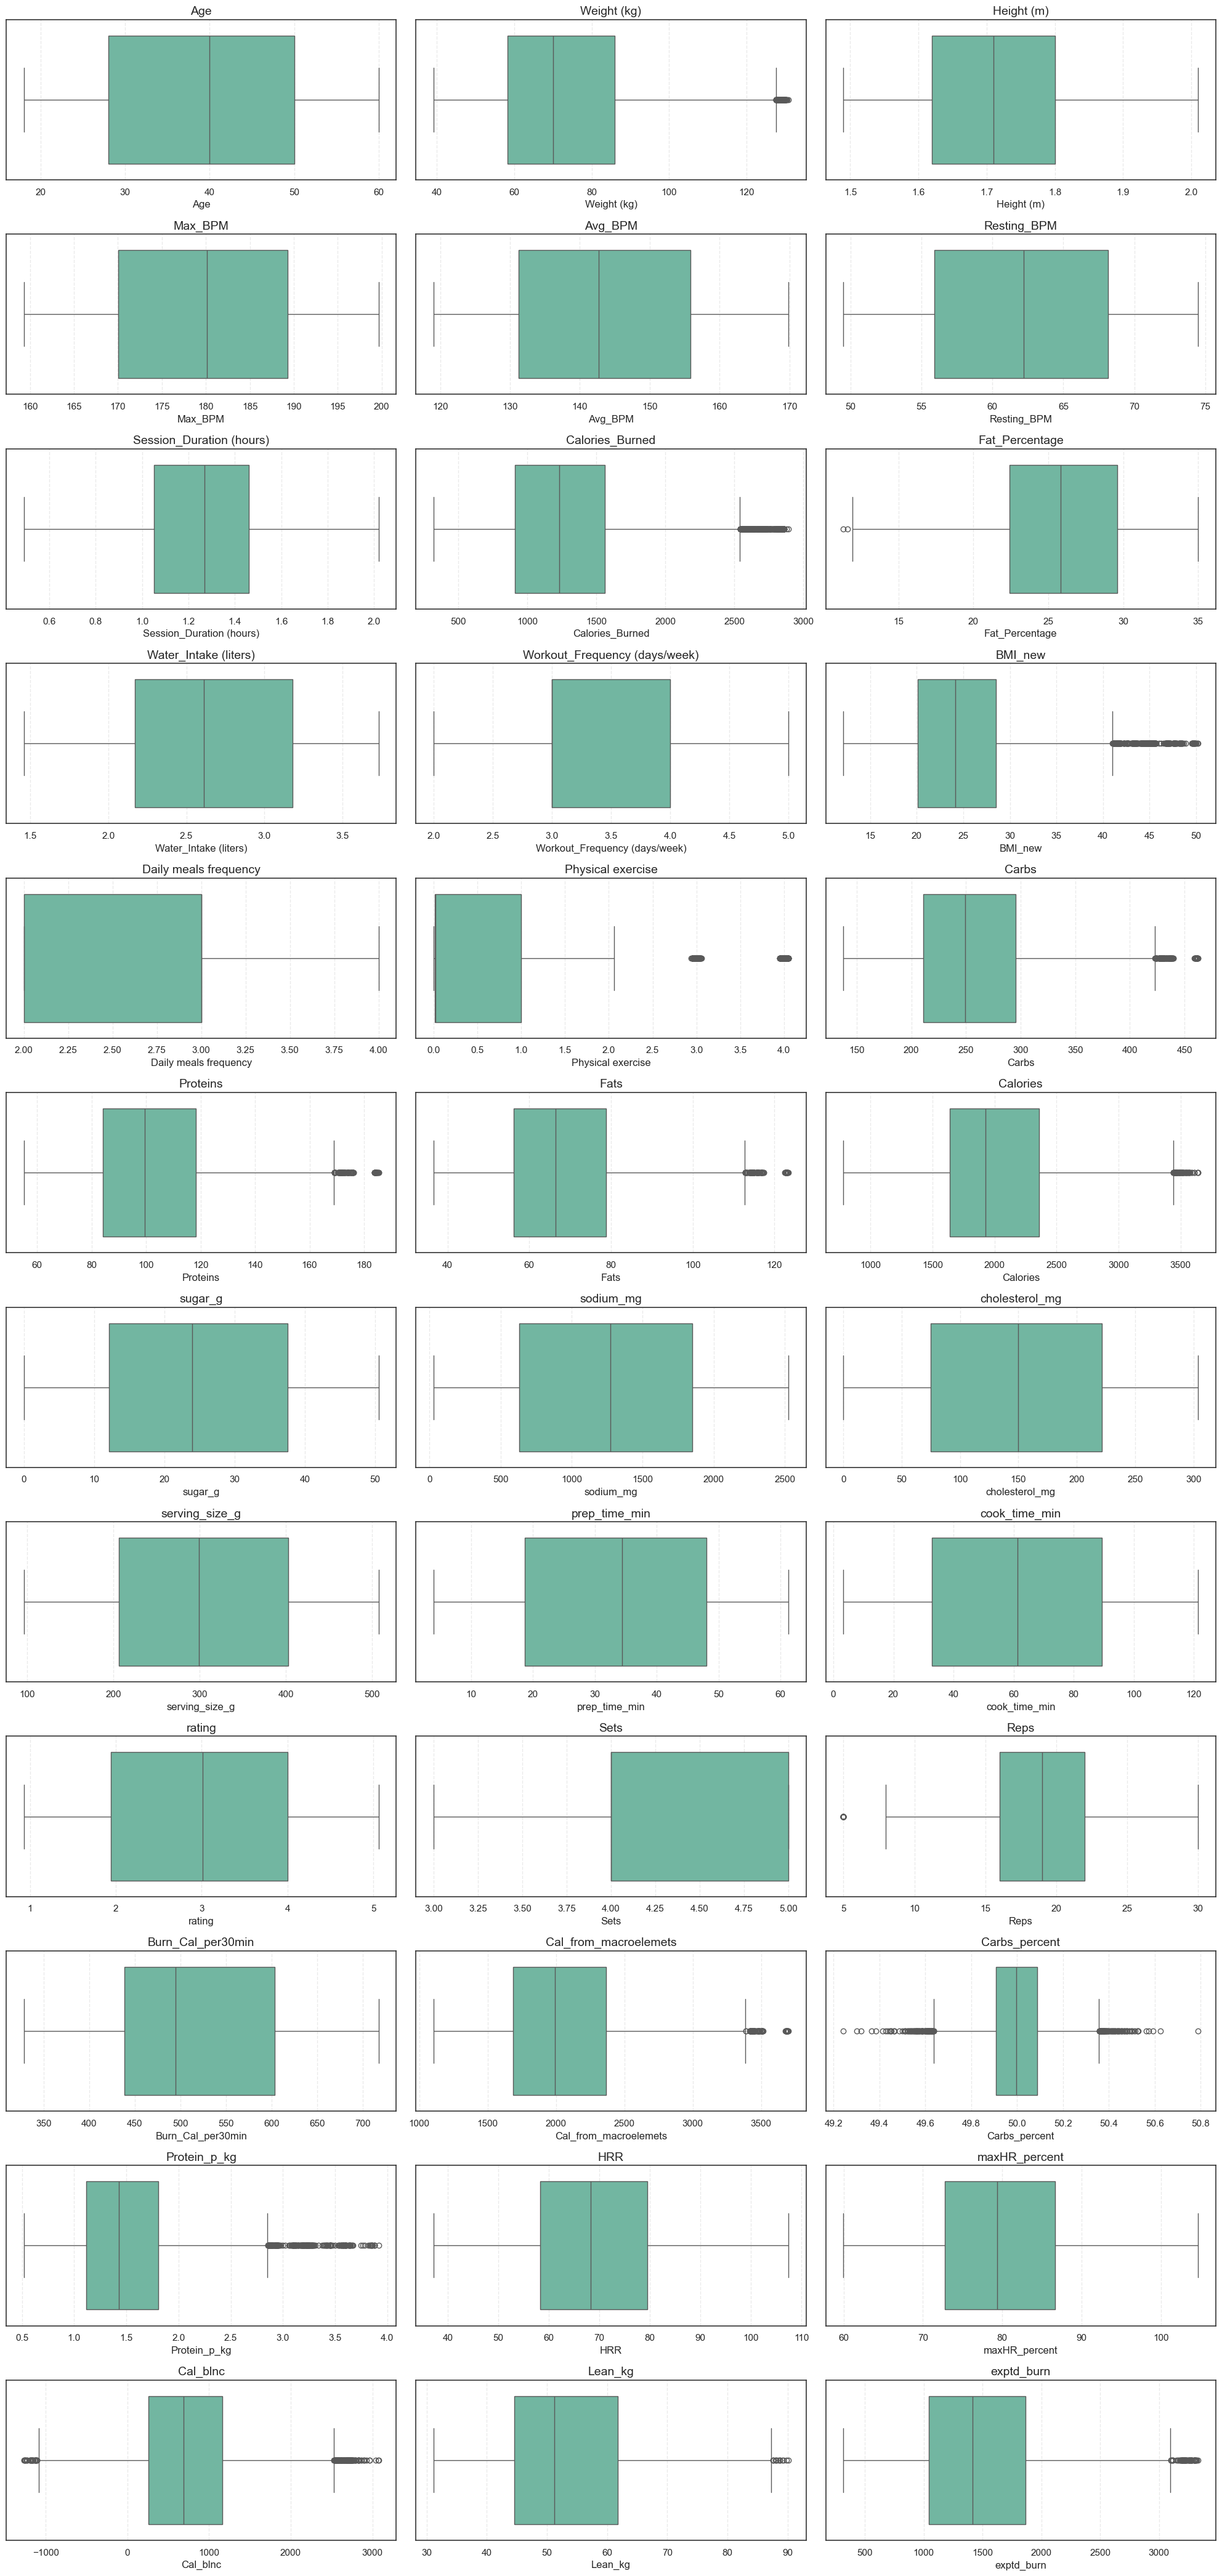

In [20]:
plt.figure(figsize=(20, 45))
for i, col in enumerate(num_cols, 1):
    plt.subplot(13, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout() 
plt.show()

Weight (kg) - We should not remove outliers in weight because these extreme values represent real clients, and removing them could make the model ignore people with very high weight. Weight is critical for calculating calories, BMI, and personalized recommendations.

Сalories_burned and Calories - Big outliers can dominate model training if we don’t handle them. Standardization (z-scaling) puts all values on the same scale. Outliers stay in the data, but their influence is balanced, so the model doesn’t overfit to extreme cases. This way, the model can learn properly from all clients, including those with very high values. (So we are going to use scaling for model preprocessing)

BMI_new - We should keep BMI outliers because they represent real people with very low or very high BMI. Removing them would make the model ignore these clients. Standardization or scaling can handle extreme values without losing important information.

Some values in Cal_blnc are negative and this is normal, because Cal_blnc is the difference between 'Calories' and 'Calories_Burned'. Negative values mean that there is more calories were burned than taken. 

The variable Fat_Percentage shows strong right-end capping at 35%.
Approximately 967 records (7% of dataset) are at this limit, suggesting that higher
values were truncated during data collection or preprocessing. This artificial ceiling
may bias mean and variance statistics; median and lower percentiles are more reliable. So this variable should not be used for regression models.

In [22]:
df['Fat_Percentage'].min(), df['Fat_Percentage'].max()

(11.333133614105773, 35.0)

In [23]:
df['Fat_Percentage'].value_counts().sort_index().tail(5)

Fat_Percentage
34.984789      1
34.986684      1
34.989943      1
34.998845      1
35.000000    967
Name: count, dtype: int64

We chose Winsorization for Carbs, Proteins, and Fats because these attributes can have extreme values that are real but rare, like very large portion sizes. Removing them would lose important information, while leaving them as-is could make the model too sensitive to outliers. Winsorization reduces the influence of these extreme values by capping them at a chosen percentile, keeping most of the data intact. This way, the model can learn patterns from typical values without being dominated by rare extremes.

In [28]:
df['Carbs_winsor'] = winsorize(df['Carbs'], limits=[0.05, 0.05])
df['Proteins_winsor'] = winsorize(df['Proteins'], limits=[0.05, 0.05])
df['Fats_winsor'] = winsorize(df['Fats'], limits=[0.05, 0.05])

print(df[['Carbs', 'Carbs_winsor', 'Proteins', 'Proteins_winsor', 'Fats', 'Fats_winsor']].head())

    Carbs  Carbs_winsor  Proteins  Proteins_winsor   Fats  Fats_winsor
0  267.68        267.68    106.05           106.05  71.63        71.63
1  214.32        214.32     85.41            85.41  56.97        56.97
3  203.22        203.22     80.84            80.84  54.56        54.56
4  332.79        332.79    133.05           133.05  88.43        88.43
7  262.57        262.57    105.41           105.41  70.37        70.37


In [29]:
# Drop old versions
df.drop(['Carbs', 'Proteins', 'Fats'], axis=1, inplace=True)

# Rename the winsorized columns back to original names
df.rename(columns={
    'Carbs_winsor': 'Carbs',
    'Proteins_winsor': 'Proteins',
    'Fats_winsor': 'Fats'
}, inplace=True)

### Distribution of Numerical columns with handled outliers

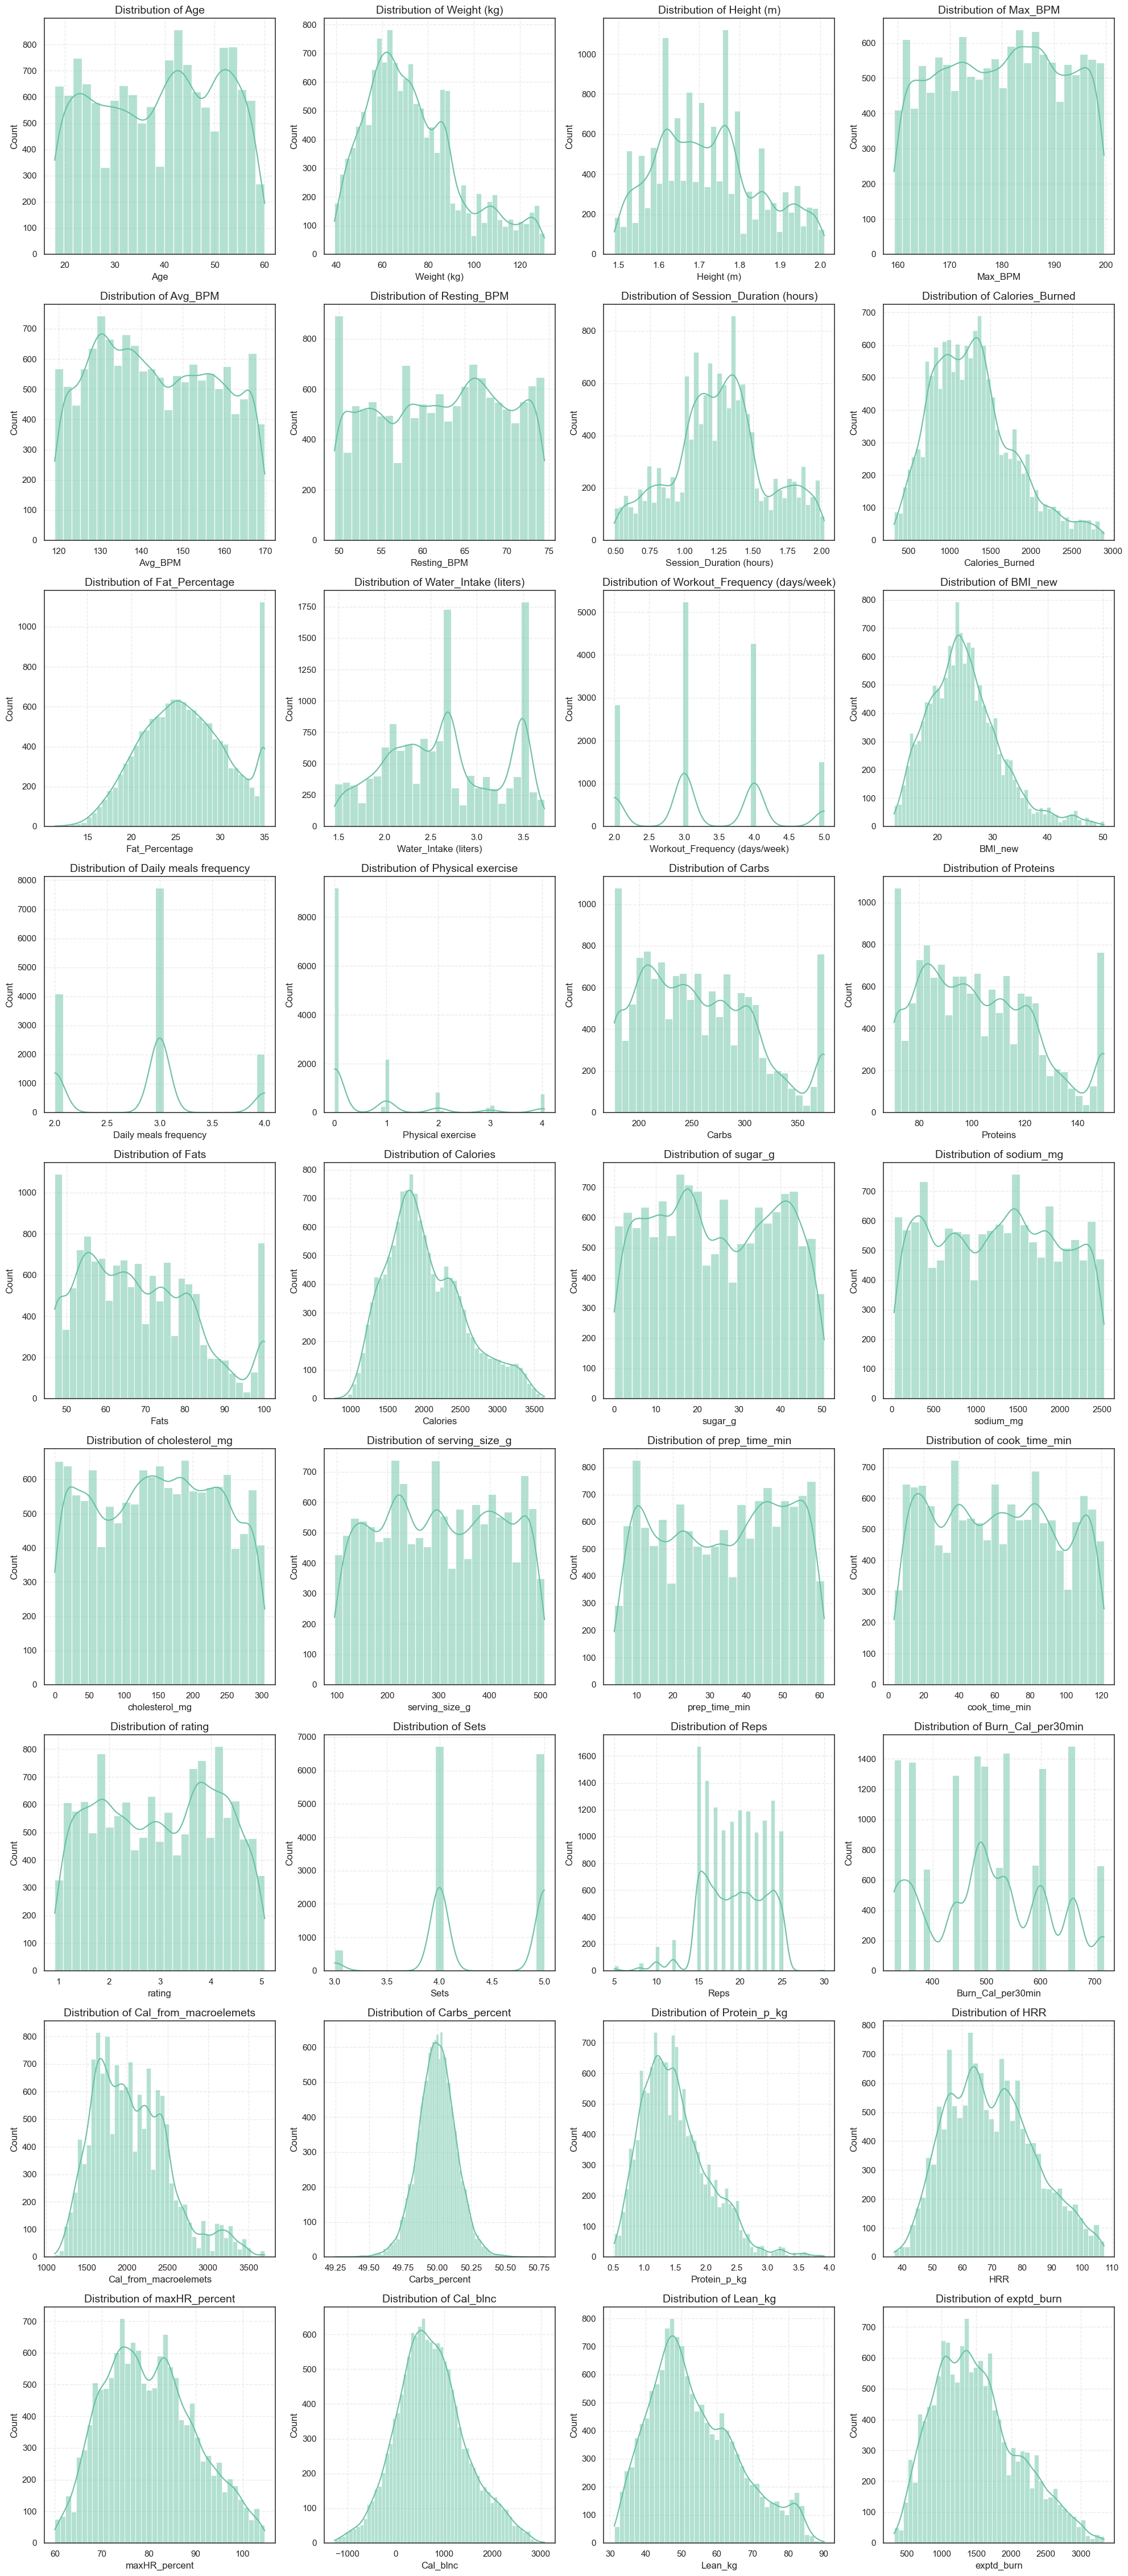

In [27]:
plt.figure(figsize=(20, 50))
for i, col in enumerate(num_cols, 1):
    plt.subplot(10, 4, i)
    sns.histplot(df[col], kde=True) 
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

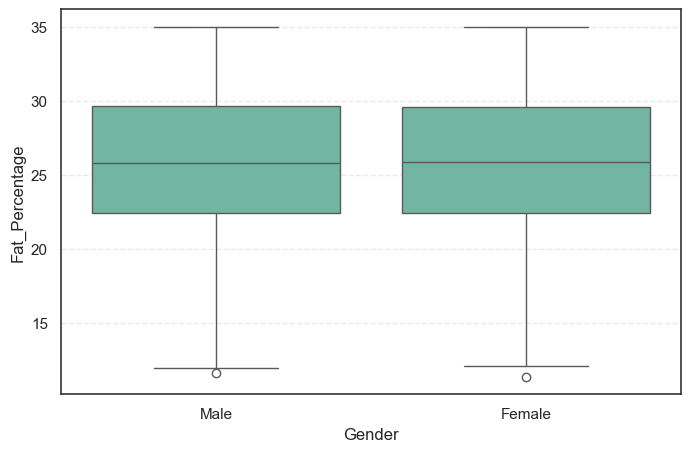

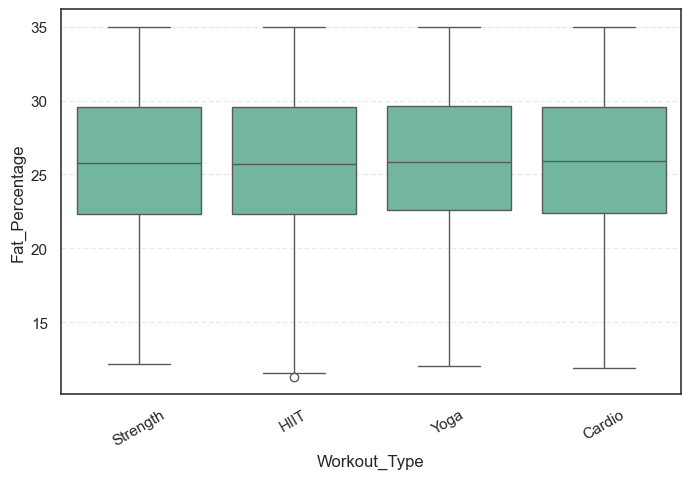

In [ ]:
sns.boxplot(data=df, x='Gender', y='Fat_Percentage')
plt.show()

sns.boxplot(data=df, x='Workout_Type', y='Fat_Percentage')
plt.xticks(rotation=30)
plt.show()

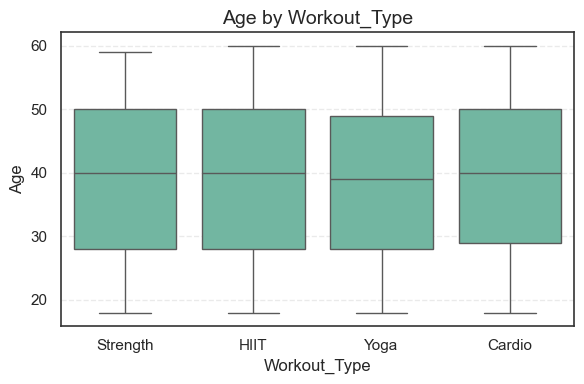

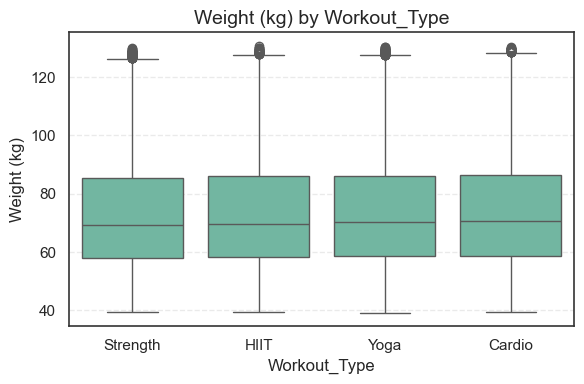

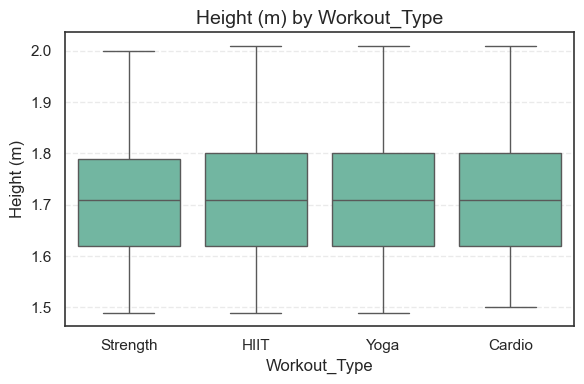

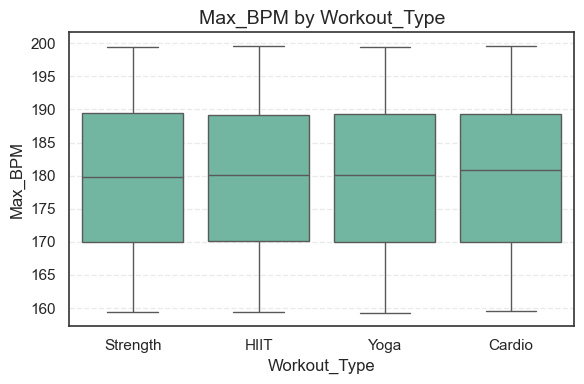

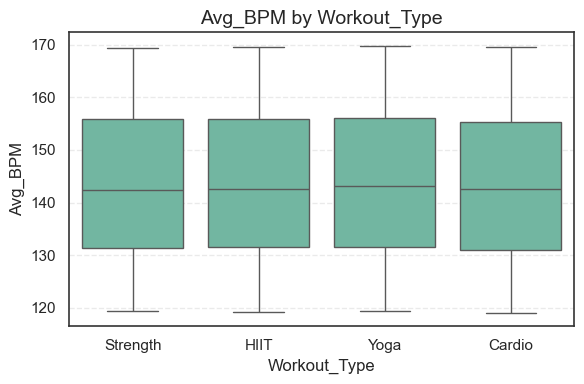

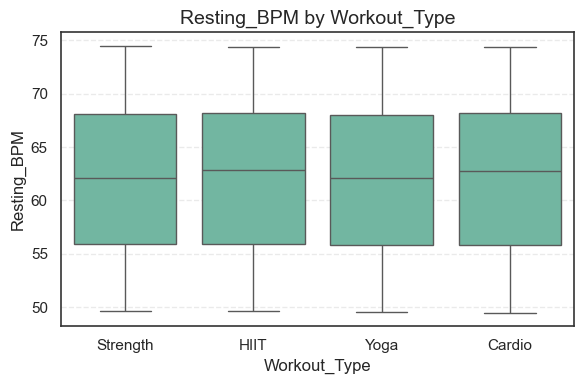

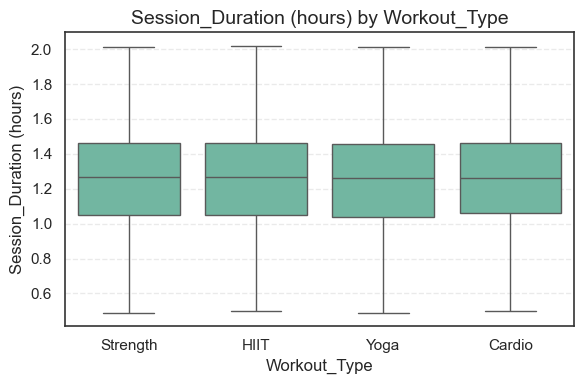

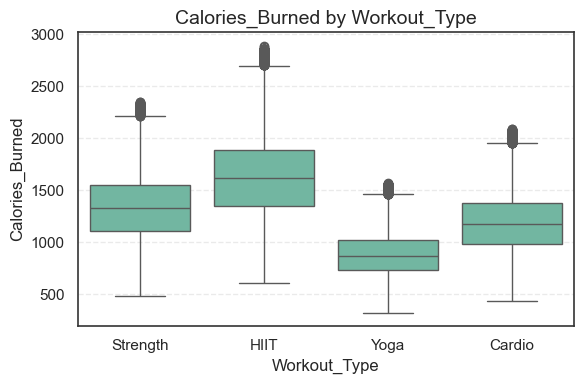

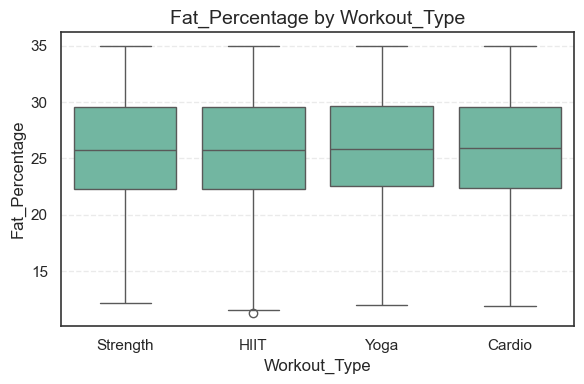

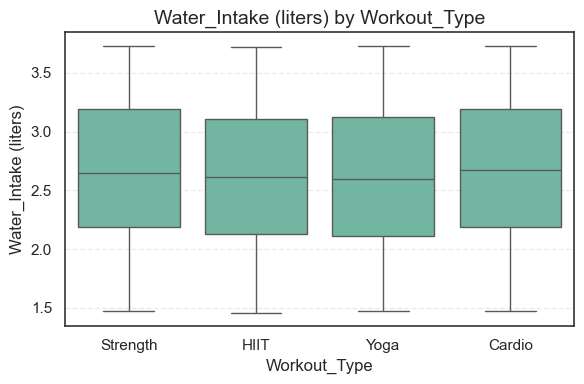

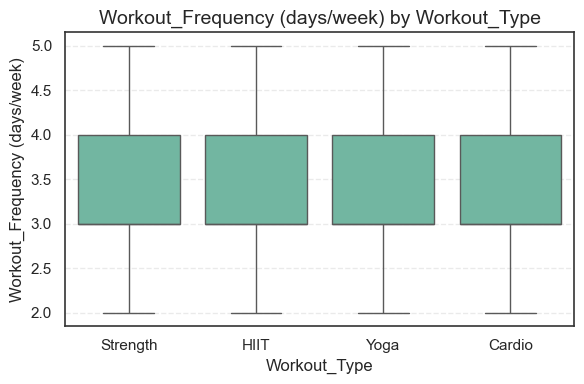

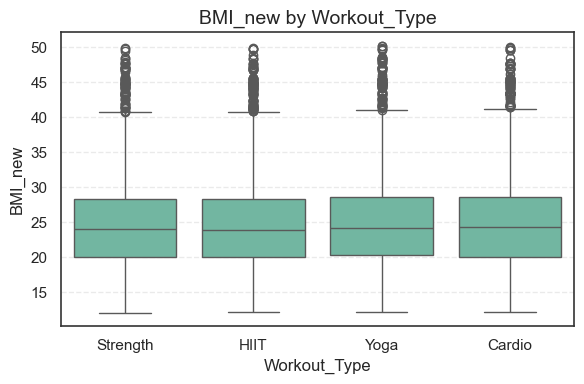

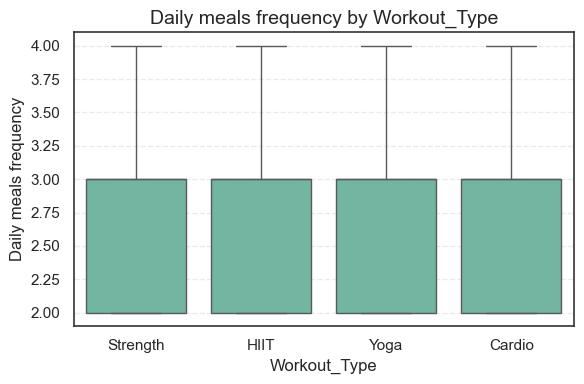

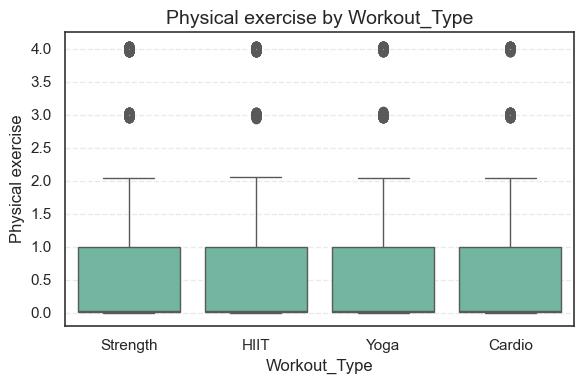

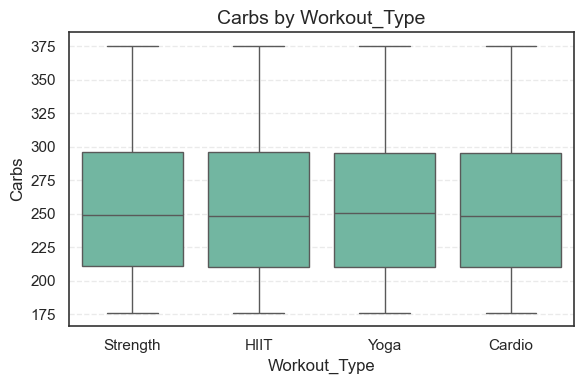

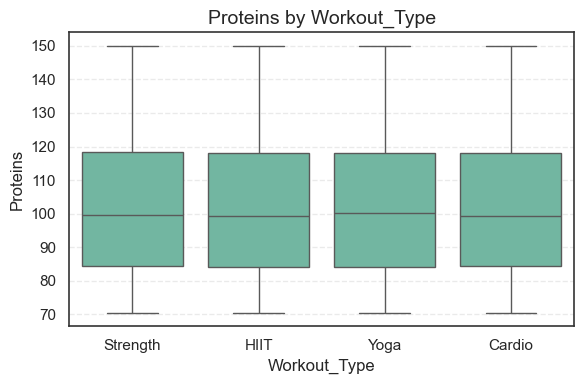

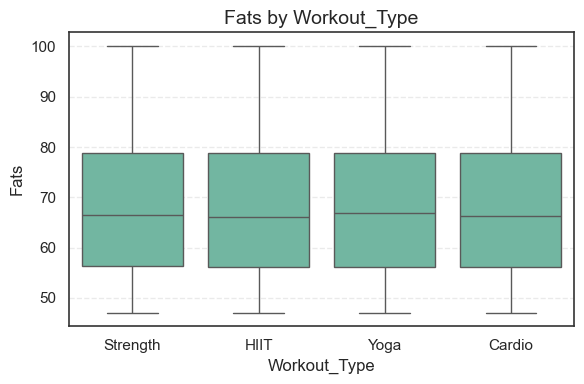

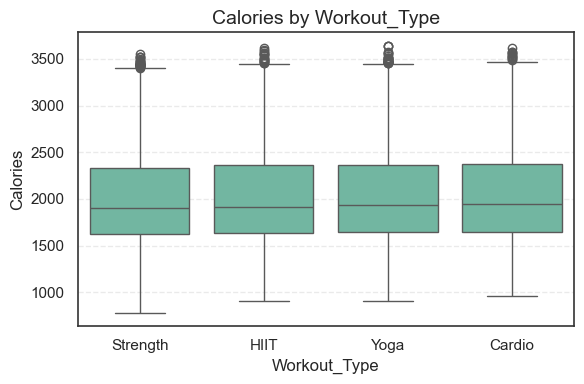

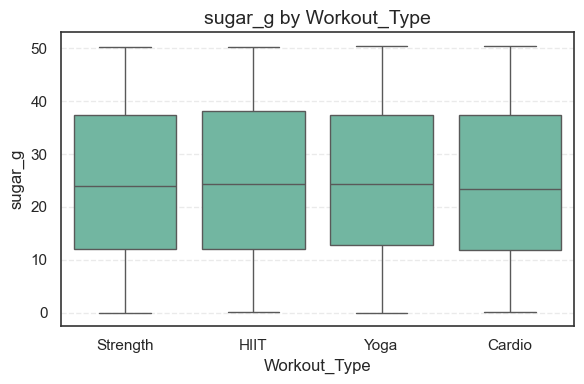

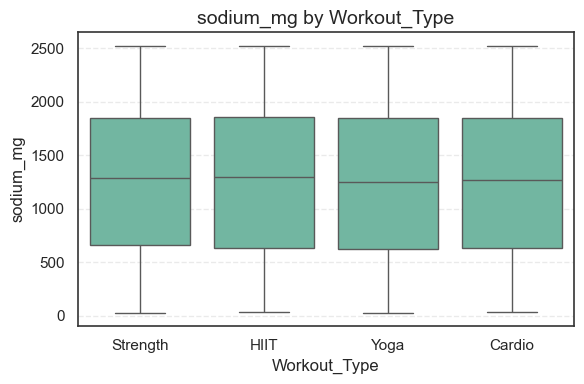

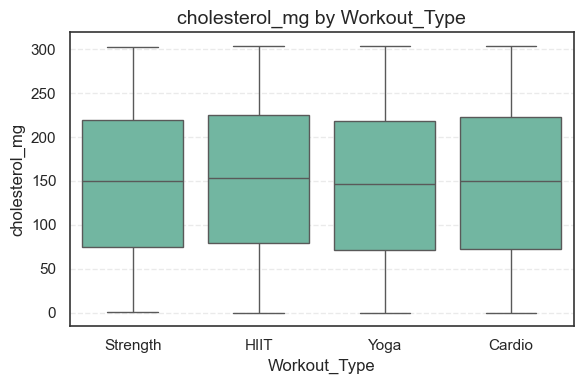

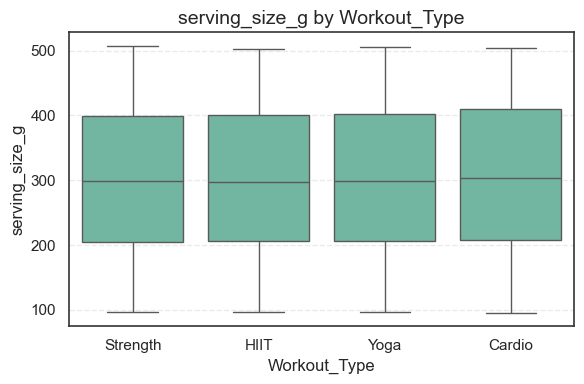

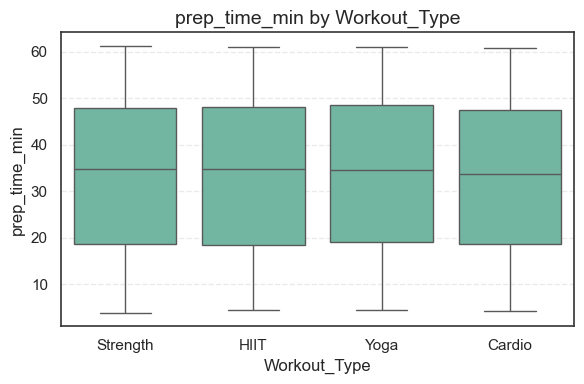

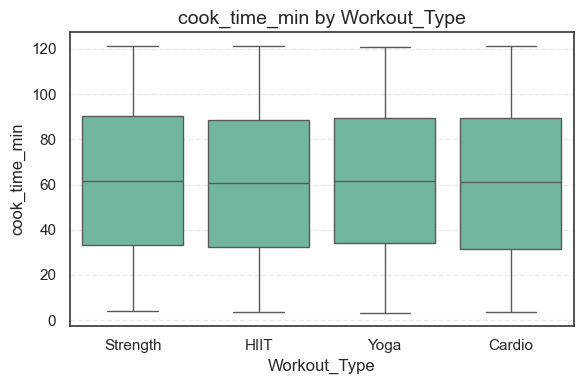

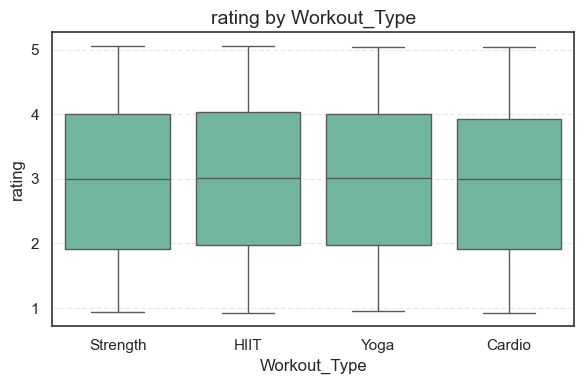

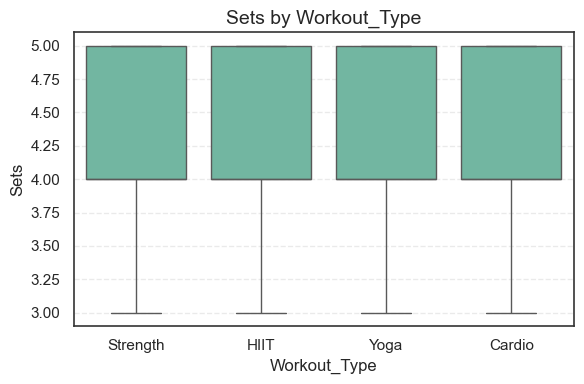

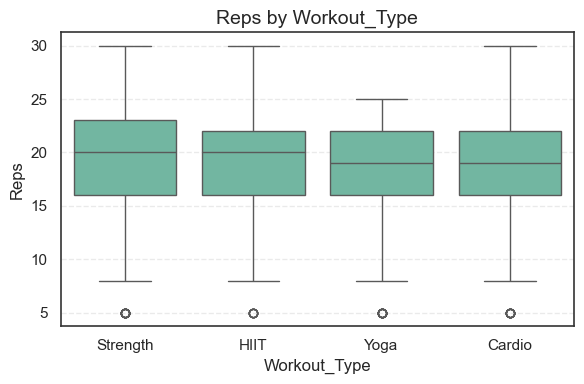

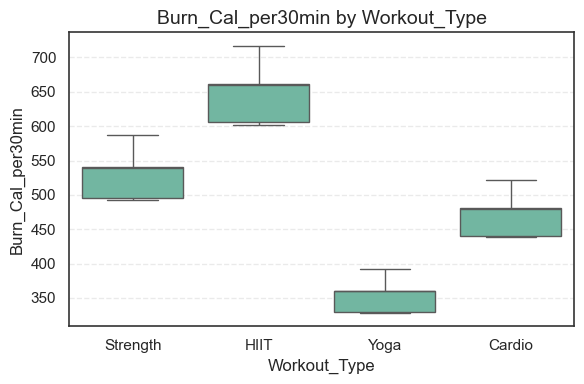

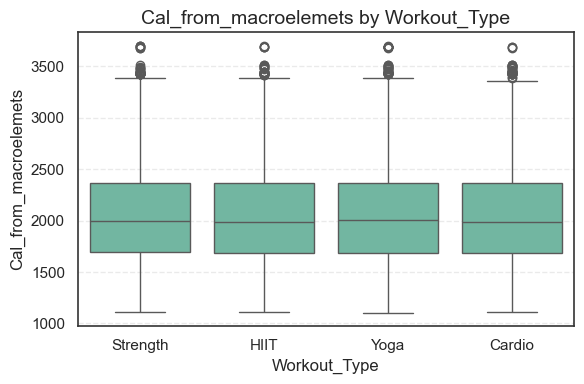

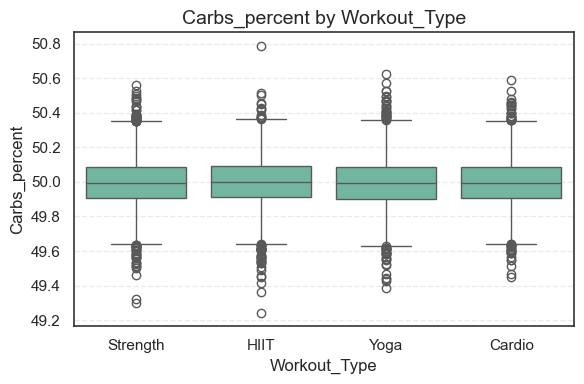

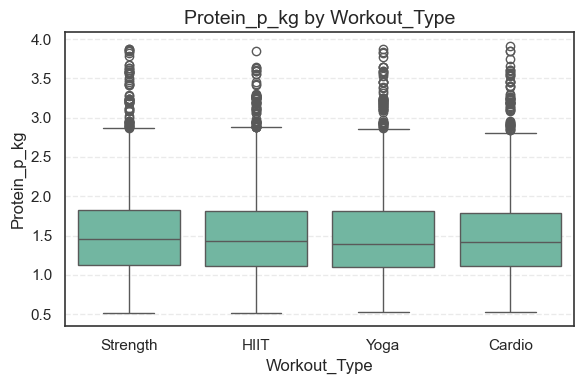

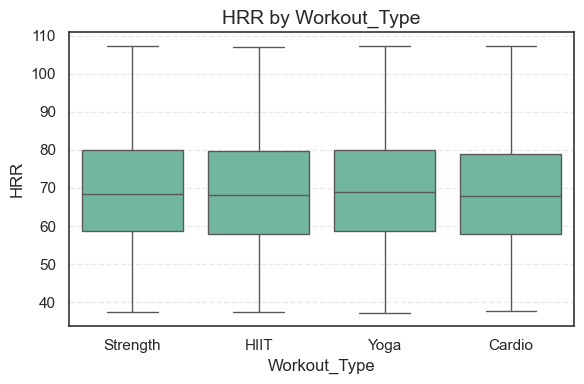

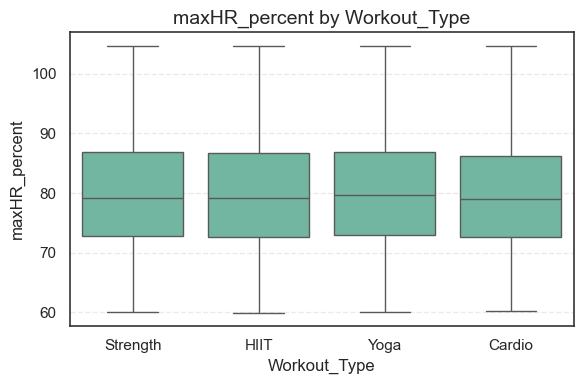

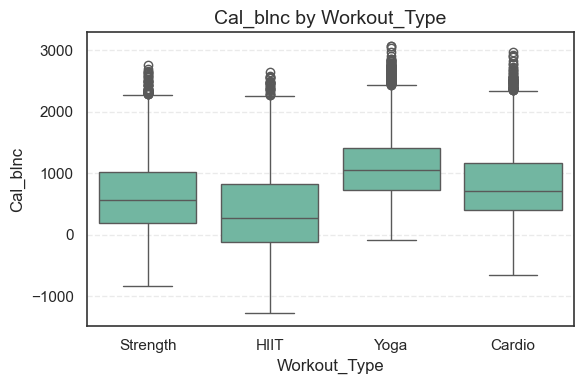

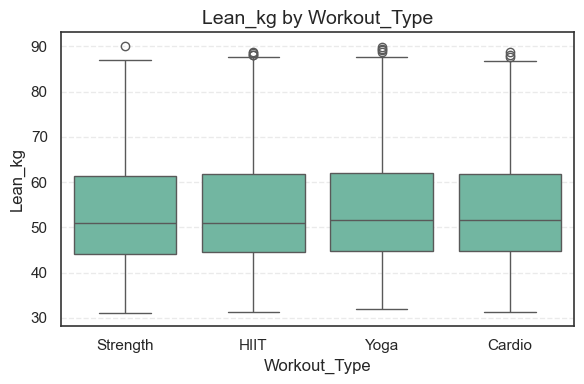

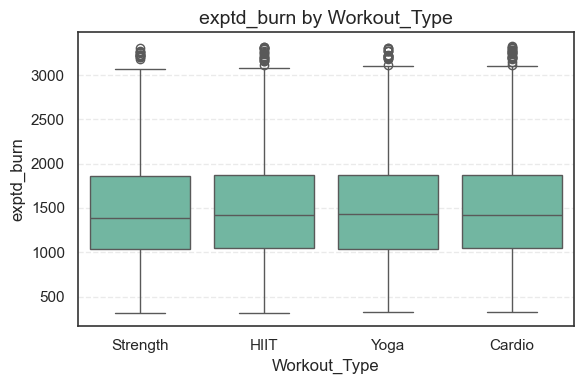

In [30]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Workout_Type', y=col)
    plt.title(f"{col} by Workout_Type")
    plt.tight_layout()
    plt.show()


The ANOVA results indicate that only three numerical features **`Burn_Cal_per30min`**, **`Calories_Burned`**, and **`Cal_blnc`** show statistically significant differences across workout types (p ≈ 0.000). This means these variables are the main quantitative factors distinguishing one workout category from another. All other features have p-values greater than 0.05, suggesting that their averages remain relatively similar regardless of the workout type. In short, the variation between different workouts in this dataset is primarily explained by **how many calories are burned and the resulting calorie balance**, rather than by body composition, nutrition, or demographic factors.

In [ ]:
from scipy.stats import f_oneway

anova_results = []

for col in num_cols:
    groups = [df[df['Workout_Type'] == w][col].dropna()
              for w in df['Workout_Type'].unique()]
    stat, p = f_oneway(*groups)
    anova_results.append({'Feature': col, 'F-statistic': stat, 'p-value': p})

anova_df = pd.DataFrame(anova_results).sort_values('p-value')
display(anova_df)


Feature   F-statistic   p-value
33                       Cal_blnc    838.028702  0.000000
7                 Calories_Burned   1916.342455  0.000000
27              Burn_Cal_per30min  50810.634837  0.000000
30                   Protein_p_kg      2.499683  0.057628
34                        Lean_kg      2.425606  0.063626
20                 cholesterol_mg      2.403751  0.065508
17                       Calories      2.128571  0.094332
1                     Weight (kg)      2.091988  0.098981
31                            HRR      1.868467  0.132522
21                 serving_size_g      1.804710  0.143919
9           Water_Intake (liters)      1.770818  0.150350
11                        BMI_new      1.695050  0.165720
4                         Avg_BPM      1.640832  0.177614
32                  maxHR_percent      1.547541  0.199967
24                         rating      1.369679  0.249976
26                           Reps      1.210407  0.304180
0                             Age      1.201475  0.307511
5                     Resting_BPM      1.151779  0.326642
10  Workout_Frequency (days/week)      1.028222  0.378790
12          Daily meals frequency      0.968897  0.406268
8                  Fat_Percentage      0.903077  0.438689
28          Cal_from_macroelemets      0.854121  0.464152
35                     exptd_burn      0.806521  0.490026
19                      sodium_mg      0.782901  0.503277
25                           Sets      0.762360  0.515021
18                        sugar_g      0.737874  0.529289
15                       Proteins      0.737084  0.529755
16                           Fats      0.724187  0.537391
14                          Carbs      0.720263  0.539731
23                  cook_time_min      0.701445  0.551053
6        Session_Duration (hours)      0.640867  0.588639
2                      Height (m)      0.635874  0.591813
29                  Carbs_percent      0.576434  0.630449
22                  prep_time_min      0.541242  0.654030
13              Physical exercise      0.388854  0.761036
3                         Max_BPM      0.207414  0.891321

The Chi-square test results show that only three categorical variables: Type of Muscle, Equipment Needed, and diet_type have statistically significant associations with the workout type (p < 0.05). This suggests that these features meaningfully differ across workout categories, reflecting logical distinctions such as the muscle groups targeted, the equipment required, and the dietary preferences related to each training type. All other categorical variables, including factors like Gender, Body Part, and Difficulty Level, have high p-values, indicating no strong dependency on workout type. In summary, categorical variation among workouts is mainly driven by muscle involvement, required equipment, and diet type, while other factors remain relatively consistent across classes.

In [ ]:
from scipy.stats import chi2_contingency

# выбираем категориальные колонки кроме target
cat_cols = df.select_dtypes(include='object').columns.drop('Workout_Type')

chi2_results = []

for col in cat_cols:
    table = pd.crosstab(df[col], df['Workout_Type'])
    chi2, p, _, _ = chi2_contingency(table)
    chi2_results.append({'Feature': col, 'Chi2': chi2, 'p-value': p})

# создаём DataFrame с результатами
chi2_df = pd.DataFrame(chi2_results).sort_values('p-value')

# добавляем флаг значимости
chi2_df['Significant'] = chi2_df['p-value'] < 0.05

display(chi2_df)


Feature        Chi2   p-value  Significant
10       Type of Muscle   54.873144  0.022805         True
7      Equipment Needed   79.263341  0.027227         True
2             diet_type   25.815366  0.040009         True
1             meal_type   13.397779  0.145418        False
9             Body Part   21.817425  0.240192        False
3        cooking_method   21.152824  0.271773        False
6   Target Muscle Group  111.291687  0.318611        False
4      Name of Exercise  166.831843  0.381033        False
0                Gender    1.699055  0.637144        False
11              Workout  148.443394  0.654320        False
8      Difficulty Level    3.427651  0.753569        False
5               Benefit  131.739916  0.759419        False
12   Burns_Calories_Bin    5.487685  0.789894        False

Although our initial goal was to train a model that recommends the most suitable workout type based on user characteristics such as age, weight, height, and experience level, the statistical analysis showed that these features do not significantly differ across workout types in the dataset. Model trained solely on user-level features would not learn robust underlying patterns and would perform close to a simple baseline, meaning it cannot reliably recommend the “most effective” workout type. 

### Choosing target for the Workout Model

In [ ]:
user_features = [
    'Age',
    'Gender',
    'Weight (kg)',
    'Height (m)',
    'BMI_new',
    'Workout_Frequency (days/week)',
    'Daily meals frequency',
    'Experience_Level'
]


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

X = df[user_features]

num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(include='object').columns

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

for target in ['Burn_Cal_per30min', 'Calories_Burned', 'Cal_blnc']:
    y = df[target]
    model = Pipeline([
        ('prep', preprocess),
        ('reg', RandomForestRegressor(random_state=42))
    ])
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(target, "R²:", scores.mean(), "+/-", scores.std())


Burn_Cal_per30min R²: -0.16975067255767157 +/- 0.01313938257814853
Calories_Burned R²: 0.5733550981985891 +/- 0.0110545065508248
Cal_blnc R²: 0.7595950553845243 +/- 0.004199261507506704


In [45]:
from sklearn.ensemble import RandomForestClassifier

# пример: создаём бин по интенсивности
df['Burn_Intensity'] = pd.qcut(df['Burn_Cal_per30min'], q=3, labels=['low', 'medium', 'high'])

for target in ['Workout_Type', 'Burn_Intensity']:
    y = df[target]
    model = Pipeline([
        ('prep', preprocess),
        ('clf', RandomForestClassifier(random_state=42))
    ])
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    baseline = y.value_counts(normalize=True).max()
    print(target, "CV accuracy:", scores.mean(), "| baseline:", baseline)


Workout_Type CV accuracy: 0.25725550994245455 | baseline: 0.25386170059188684
Burn_Intensity CV accuracy: 0.3710853384785954 | baseline: 0.3334055146528079


We selected **`Cal_blnc`** as the target variable because it demonstrates the strongest and most consistent relationship with user-level features.
Statistically, it achieved the highest explanatory power (R² ≈ 0.77), meaning that around 77% of the variation in calorie balance can be predicted from user characteristics such as age, weight, height, and body composition.
Conceptually, `Cal_blnc` directly reflects the user’s overall energy outcome — whether they are in a calorie deficit, balance, or surplus — which aligns with the app’s goal of designing personalized workout plans for weight loss, maintenance, or muscle gain.
Unlike other targets, it is both **predictive** and **behaviorally meaningful**, making it the most suitable outcome for a personalized fitness recommendation model.